# Importing all of the libraries 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import folium as fol
sns.set_style("darkgrid")
import warnings
warnings.simplefilter(action='ignore', category=Warning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from geopy.geocoders import Nominatim
plt.style.use('dark_background')

# Importing the csv file and performing bacis lookouts 



In [4]:
df=pd.read_csv(r"C:\Users\hp\Downloads\student_depression_dataset.csv")

In [5]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [6]:
df.shape

(27901, 18)

In [7]:
df.drop('id',axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  De

# checking min and max value 

In [10]:
for x in df.select_dtypes(exclude=object):
    print( f'{x} \n min value:{df[x].min()} and max value :{df[x].max()}')
    print('----------------------------------------')


Age 
 min value:18.0 and max value :59.0
----------------------------------------
Academic Pressure 
 min value:0.0 and max value :5.0
----------------------------------------
Work Pressure 
 min value:0.0 and max value :5.0
----------------------------------------
CGPA 
 min value:0.0 and max value :10.0
----------------------------------------
Study Satisfaction 
 min value:0.0 and max value :5.0
----------------------------------------
Job Satisfaction 
 min value:0.0 and max value :4.0
----------------------------------------
Work/Study Hours 
 min value:0.0 and max value :12.0
----------------------------------------
Depression 
 min value:0 and max value :1
----------------------------------------


# checking for false values and checking the distribution of data 

In [12]:
for x in df.select_dtypes(object):
    print(df[x].value_counts())
    print("---------------------------------------")


Gender
Male      15547
Female    12354
Name: count, dtype: int64
---------------------------------------
City
Kalyan                  1570
Srinagar                1372
Hyderabad               1340
Vasai-Virar             1290
Lucknow                 1155
Thane                   1139
Ludhiana                1111
Agra                    1094
Surat                   1078
Kolkata                 1066
Jaipur                  1036
Patna                   1007
Visakhapatnam            969
Pune                     968
Ahmedabad                951
Bhopal                   934
Chennai                  885
Meerut                   825
Rajkot                   816
Delhi                    768
Bangalore                767
Ghaziabad                745
Mumbai                   699
Vadodara                 694
Varanasi                 685
Nagpur                   651
Indore                   643
Kanpur                   609
Nashik                   547
Faridabad                461
Saanvi              

# dropping usless data

In [14]:
df.drop(df[df['Financial Stress']=='?'].index,axis=0,inplace=True)

In [15]:
for x in df.select_dtypes(object):
    print(df[x].value_counts())
    print("---------------------------------------")


Gender
Male      15546
Female    12352
Name: count, dtype: int64
---------------------------------------
City
Kalyan                  1570
Srinagar                1372
Hyderabad               1339
Vasai-Virar             1290
Lucknow                 1155
Thane                   1139
Ludhiana                1111
Agra                    1094
Surat                   1078
Kolkata                 1065
Jaipur                  1036
Patna                   1007
Visakhapatnam            969
Pune                     968
Ahmedabad                951
Bhopal                   934
Chennai                  885
Meerut                   825
Rajkot                   816
Delhi                    768
Bangalore                767
Ghaziabad                745
Mumbai                   699
Vadodara                 694
Varanasi                 684
Nagpur                   651
Indore                   643
Kanpur                   609
Nashik                   547
Faridabad                461
Saanvi              

In [16]:
df=df[df.Profession == "Student"]

In [17]:
df.drop('Profession',axis=1,inplace=True)

In [18]:
df

,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,Male,27.0,Ludhiana,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,Male,31.0,Faridabad,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,Female,18.0,Ludhiana,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


# Mapping 0 to No and 1 to Yes

In [20]:
df['Depression']=df['Depression'].map({1:'Yes',0:'No'})

In [21]:
df

,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,Yes
1,Female,24.0,Bangalore,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,No
2,Male,31.0,Srinagar,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,No
3,Female,28.0,Varanasi,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,Yes
4,Female,25.0,Jaipur,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,No
27897,Male,27.0,Ludhiana,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,No
27898,Male,31.0,Faridabad,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,No
27899,Female,18.0,Ludhiana,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,Yes


In [22]:
df.drop('Job Satisfaction',axis=1,inplace=True)

In [23]:
df['Work Pressure'].value_counts()

Work Pressure
0.0    27864
5.0        2
2.0        1
Name: count, dtype: int64

In [24]:
df.drop('Work Pressure',axis=1,inplace=True)

In [25]:
df

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,Yes
1,Female,24.0,Bangalore,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,No
2,Male,31.0,Srinagar,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,No
3,Female,28.0,Varanasi,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,Yes
4,Female,25.0,Jaipur,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,5.0,5.75,5.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,No
27897,Male,27.0,Ludhiana,2.0,9.40,3.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,No
27898,Male,31.0,Faridabad,3.0,6.61,4.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,No
27899,Female,18.0,Ludhiana,5.0,6.88,2.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,Yes


<Axes: ylabel='Age'>

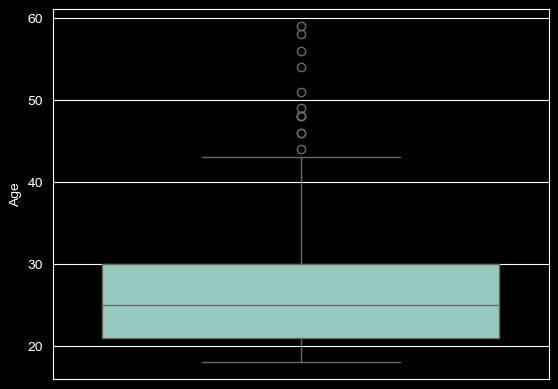

In [26]:
sns.boxplot(df['Age'])

In [27]:
df.drop(df[df['Age']>43].index,axis=0,inplace=True)

In [28]:
df.reset_index(inplace=True)

In [29]:
df.drop('index',axis=1,inplace=True)

# Our final dataframe for Visualization

In [31]:
df

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,Yes
1,Female,24.0,Bangalore,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,No
2,Male,31.0,Srinagar,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,No
3,Female,28.0,Varanasi,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,Yes
4,Female,25.0,Jaipur,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27850,Female,27.0,Surat,5.0,5.75,5.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,No
27851,Male,27.0,Ludhiana,2.0,9.40,3.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,No
27852,Male,31.0,Faridabad,3.0,6.61,4.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,No
27853,Female,18.0,Ludhiana,5.0,6.88,2.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,Yes


In [32]:
for i in df.select_dtypes(include="object"):
    print(i)

Gender
City
Sleep Duration
Dietary Habits
Degree
Have you ever had suicidal thoughts ?
Financial Stress
Family History of Mental Illness
Depression


# VISUALIZATION

# checking the distribution of dataset


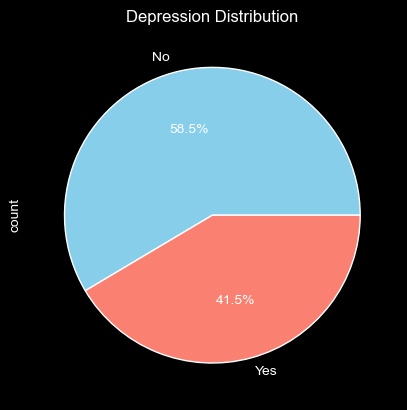

In [35]:
df['Depression'].value_counts().plot.pie(autopct='%1.1f%%', labels=['No', 'Yes'], colors=['skyblue', 'salmon'], title='Depression Distribution');

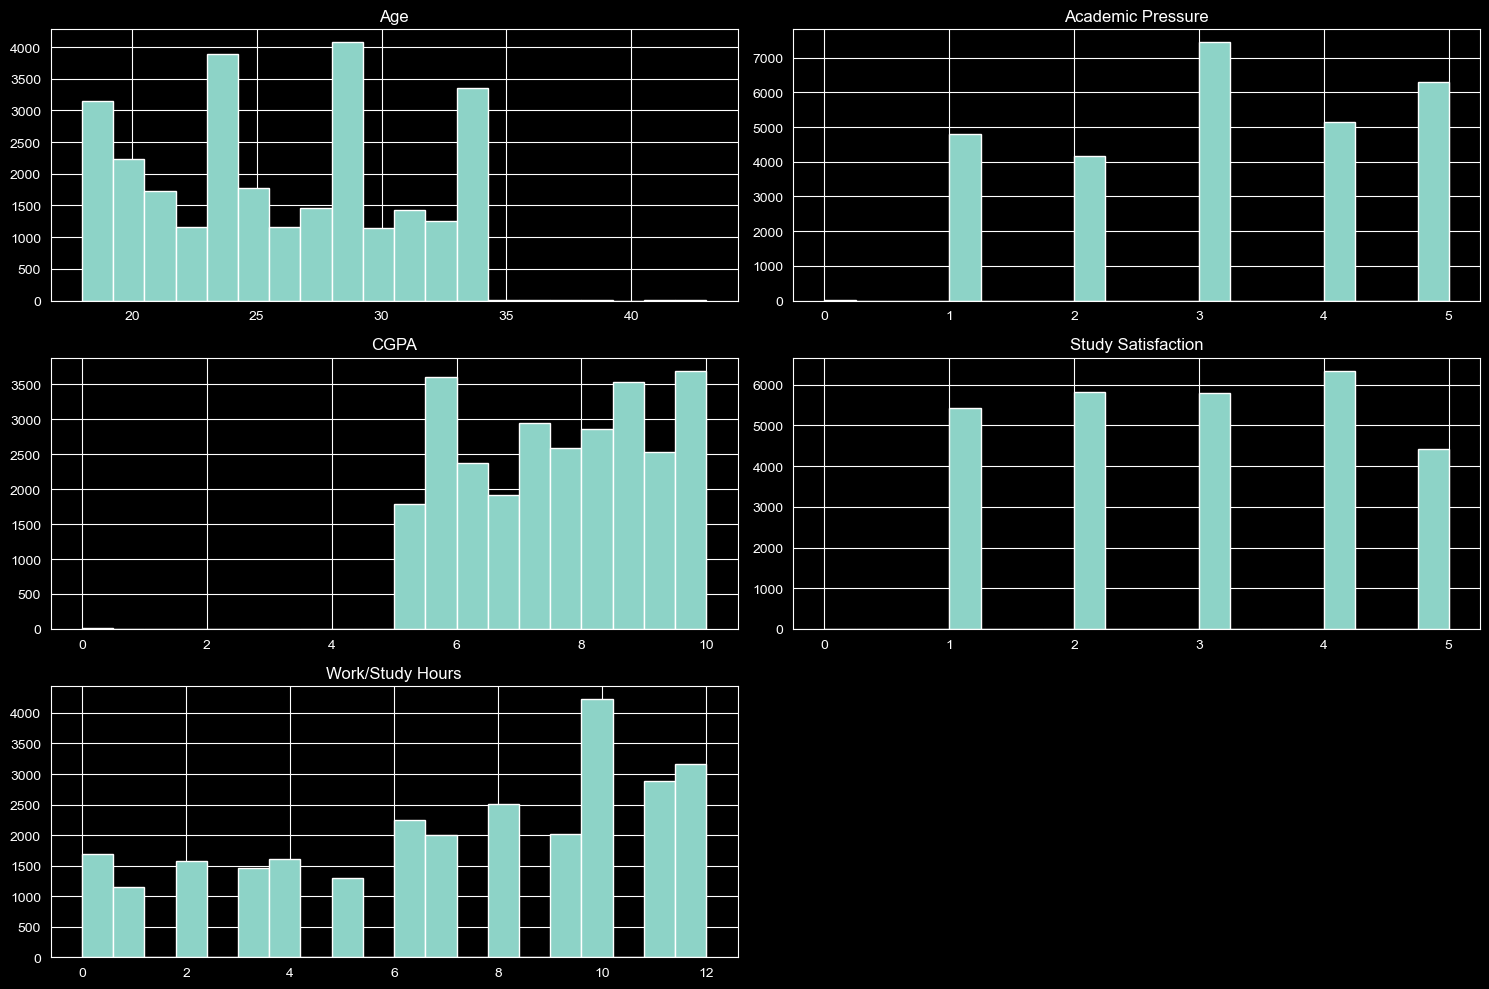

In [36]:
num_features = ['Age', 'Academic Pressure', 'CGPA', 
                'Study Satisfaction', 'Sleep Duration', 'Work/Study Hours']
df[num_features].hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

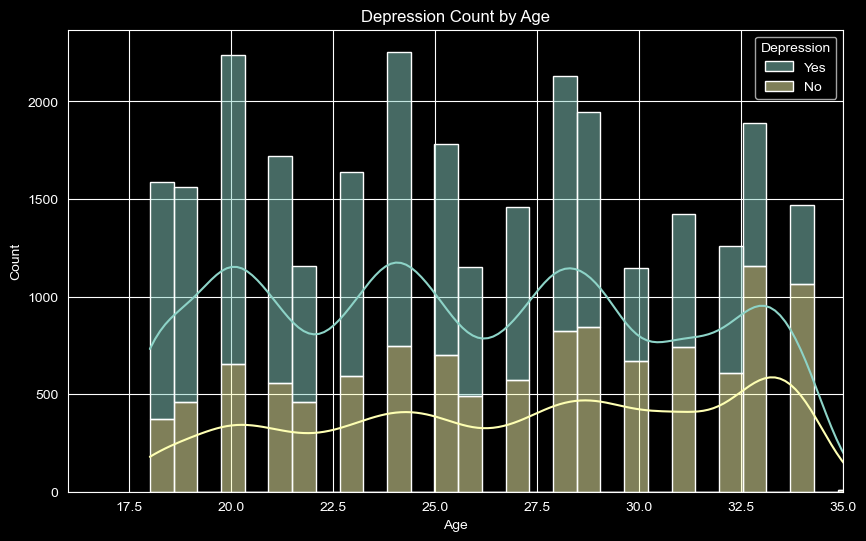

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Depression', multiple='stack', kde=True)
plt.title('Depression Count by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xlim(16,35)
plt.show()

# comparing data 

In [39]:
def plot_compare_graph(data,x,hue):
    for hue in hue:
        
        
        totals = data[x].value_counts()
        
        
        prop = (data.groupby([x,hue]).size().reset_index(name='Count'))
        
        
        prop['Total'] = prop[x].map(totals)
        prop['Proportion'] = prop['Count'] / prop['Total']
        plt.figure(figsize=(12,8),dpi=200)
        sns.barplot(data=prop, x=x, y='Proportion', hue=hue, palette='pastel')
        plt.title(f"Proportion of {x} and {hue}")
        plt.ylabel("Proportion (0 to 1)")
        plt.xlabel(x)
        plt.ylim(0, 1)
        plt.tight_layout()
        plt.xticks(rotation=90)
        plt.show()
    


In [40]:
totals=df['Gender'].value_counts()


In [41]:
prop=df.groupby(['Gender','Depression']).size().reset_index(name='Count')
prop['Total'] = prop['Gender'].map(totals)



In [42]:
prop

,Gender,Depression,Count,Total
0,Female,No,5126,12331
1,Female,Yes,7205,12331
2,Male,No,6424,15524
3,Male,Yes,9100,15524


In [43]:
totals

Gender
Male      15524
Female    12331
Name: count, dtype: int64

# Comparing gender to data

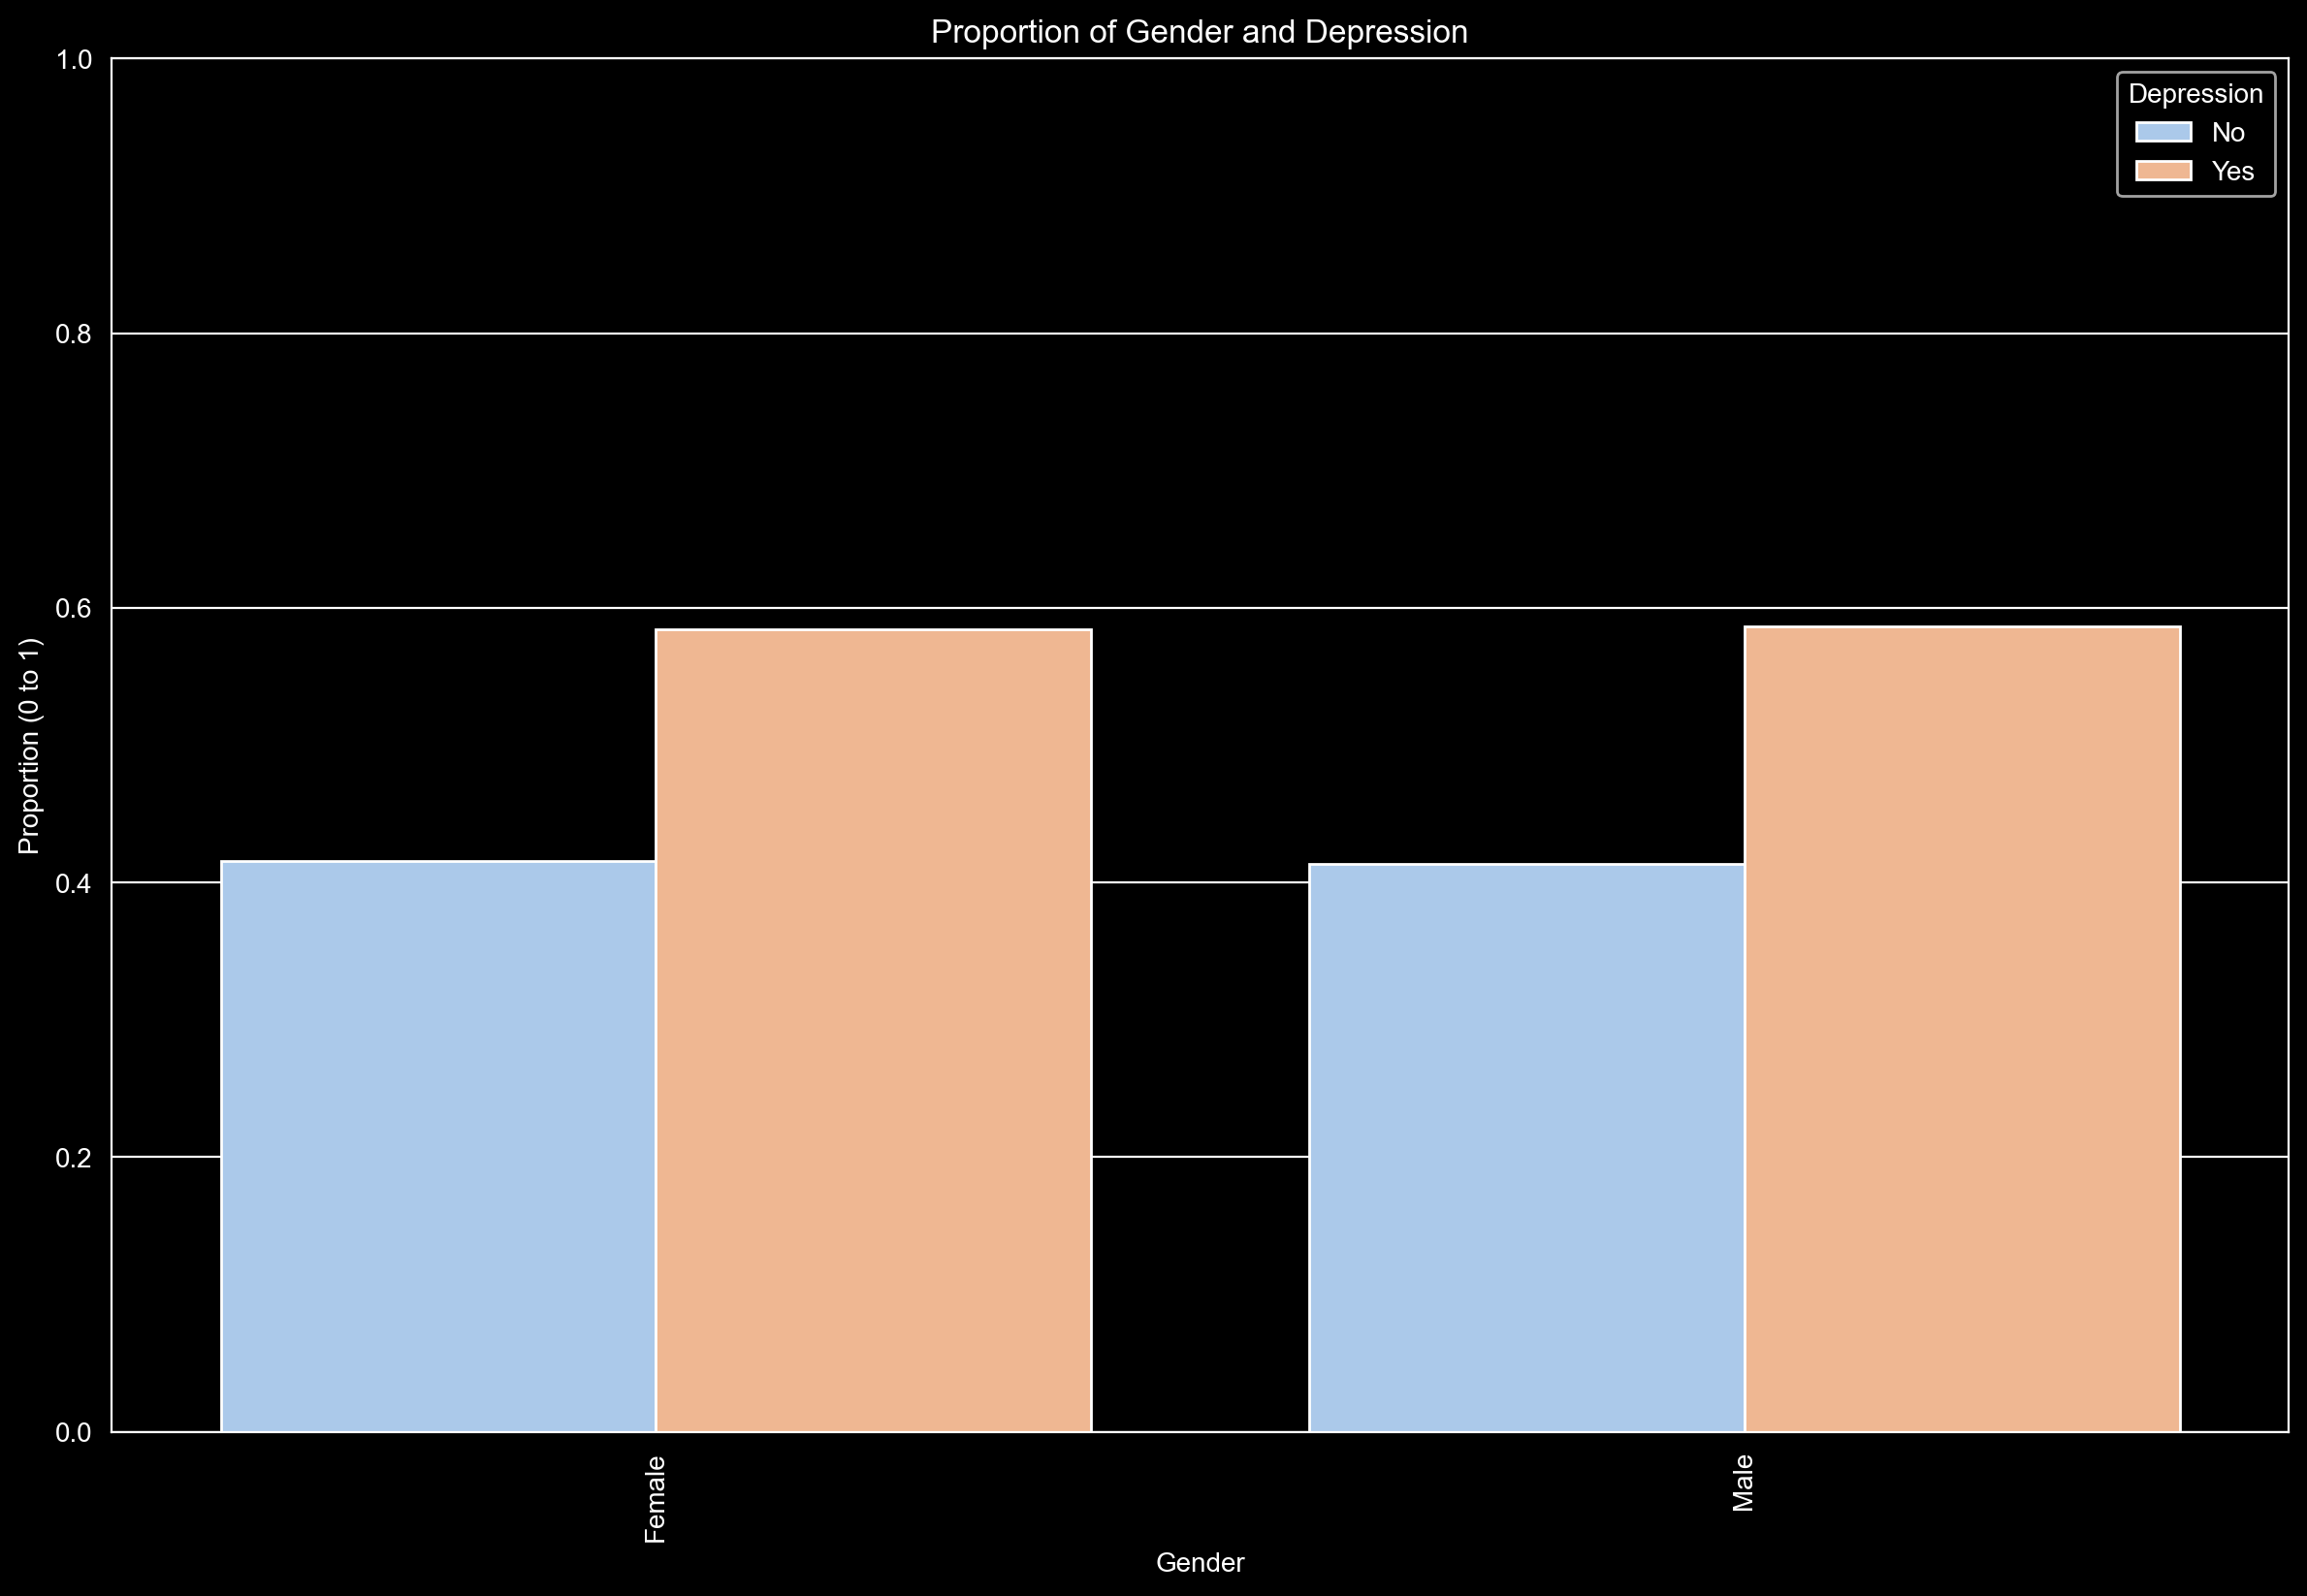

In [45]:
plot_compare_graph(data=df,x='Gender',hue=['Depression'])

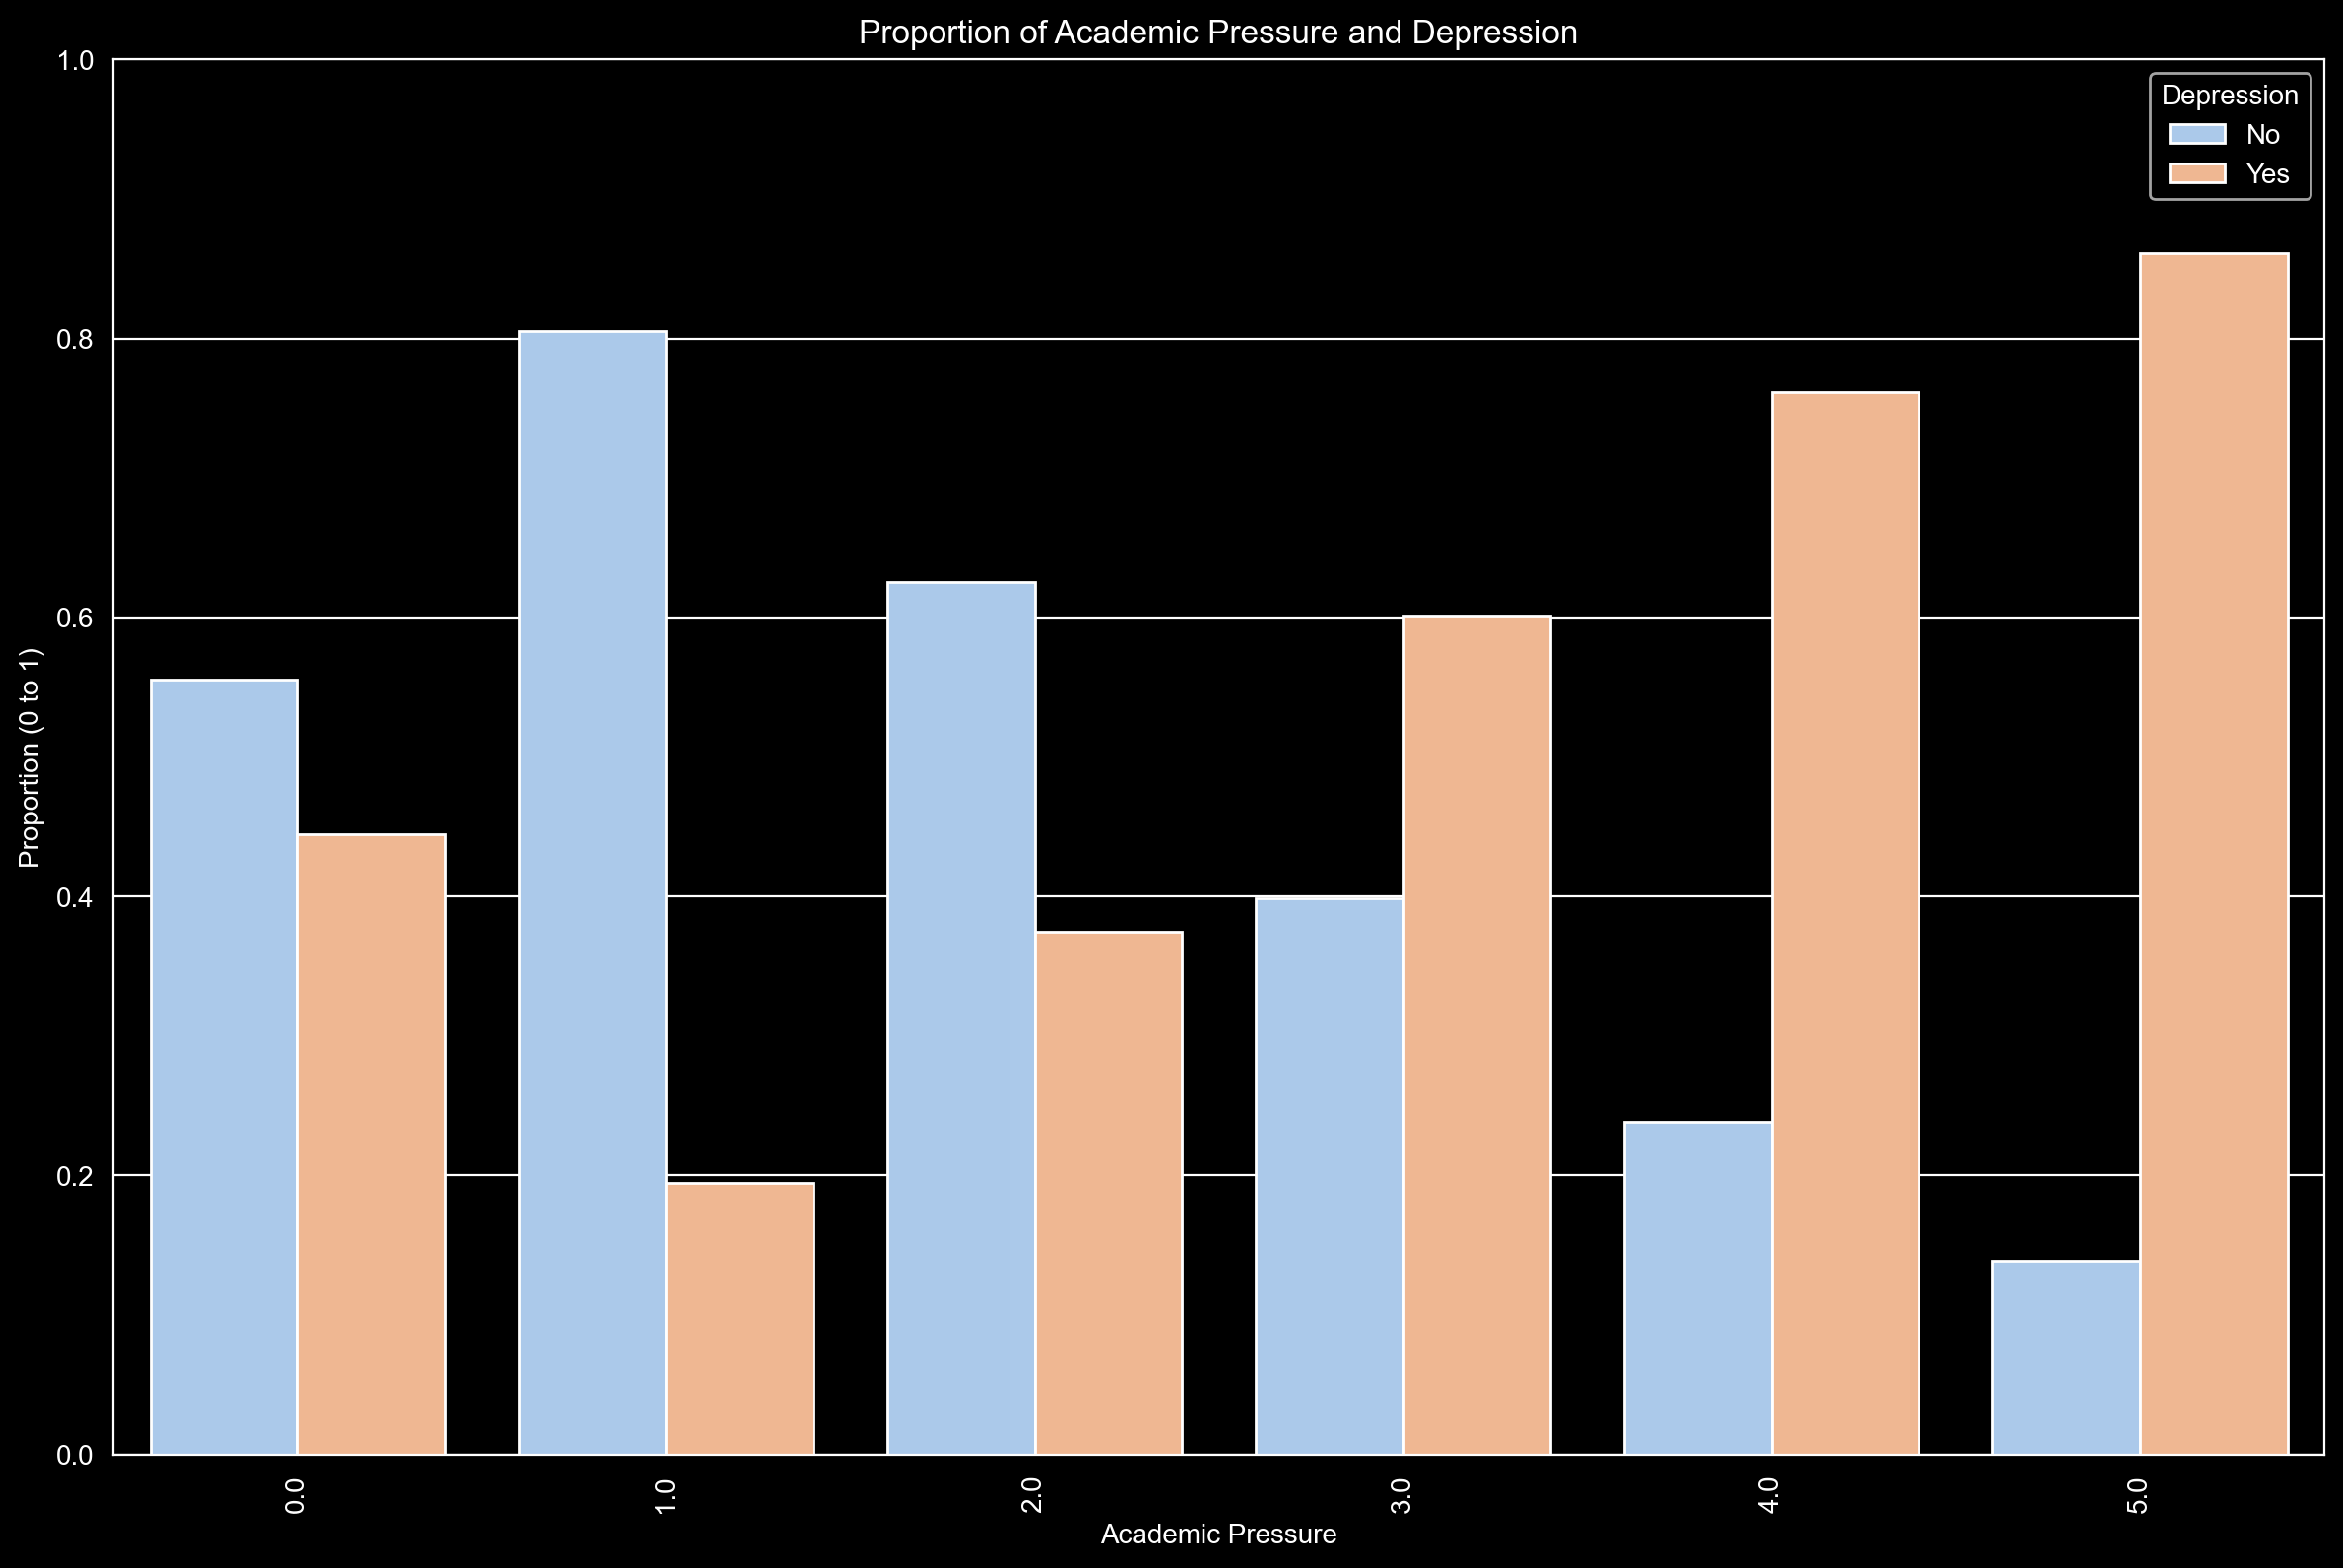

In [46]:
plot_compare_graph(data=df,x='Academic Pressure',hue=['Depression'])

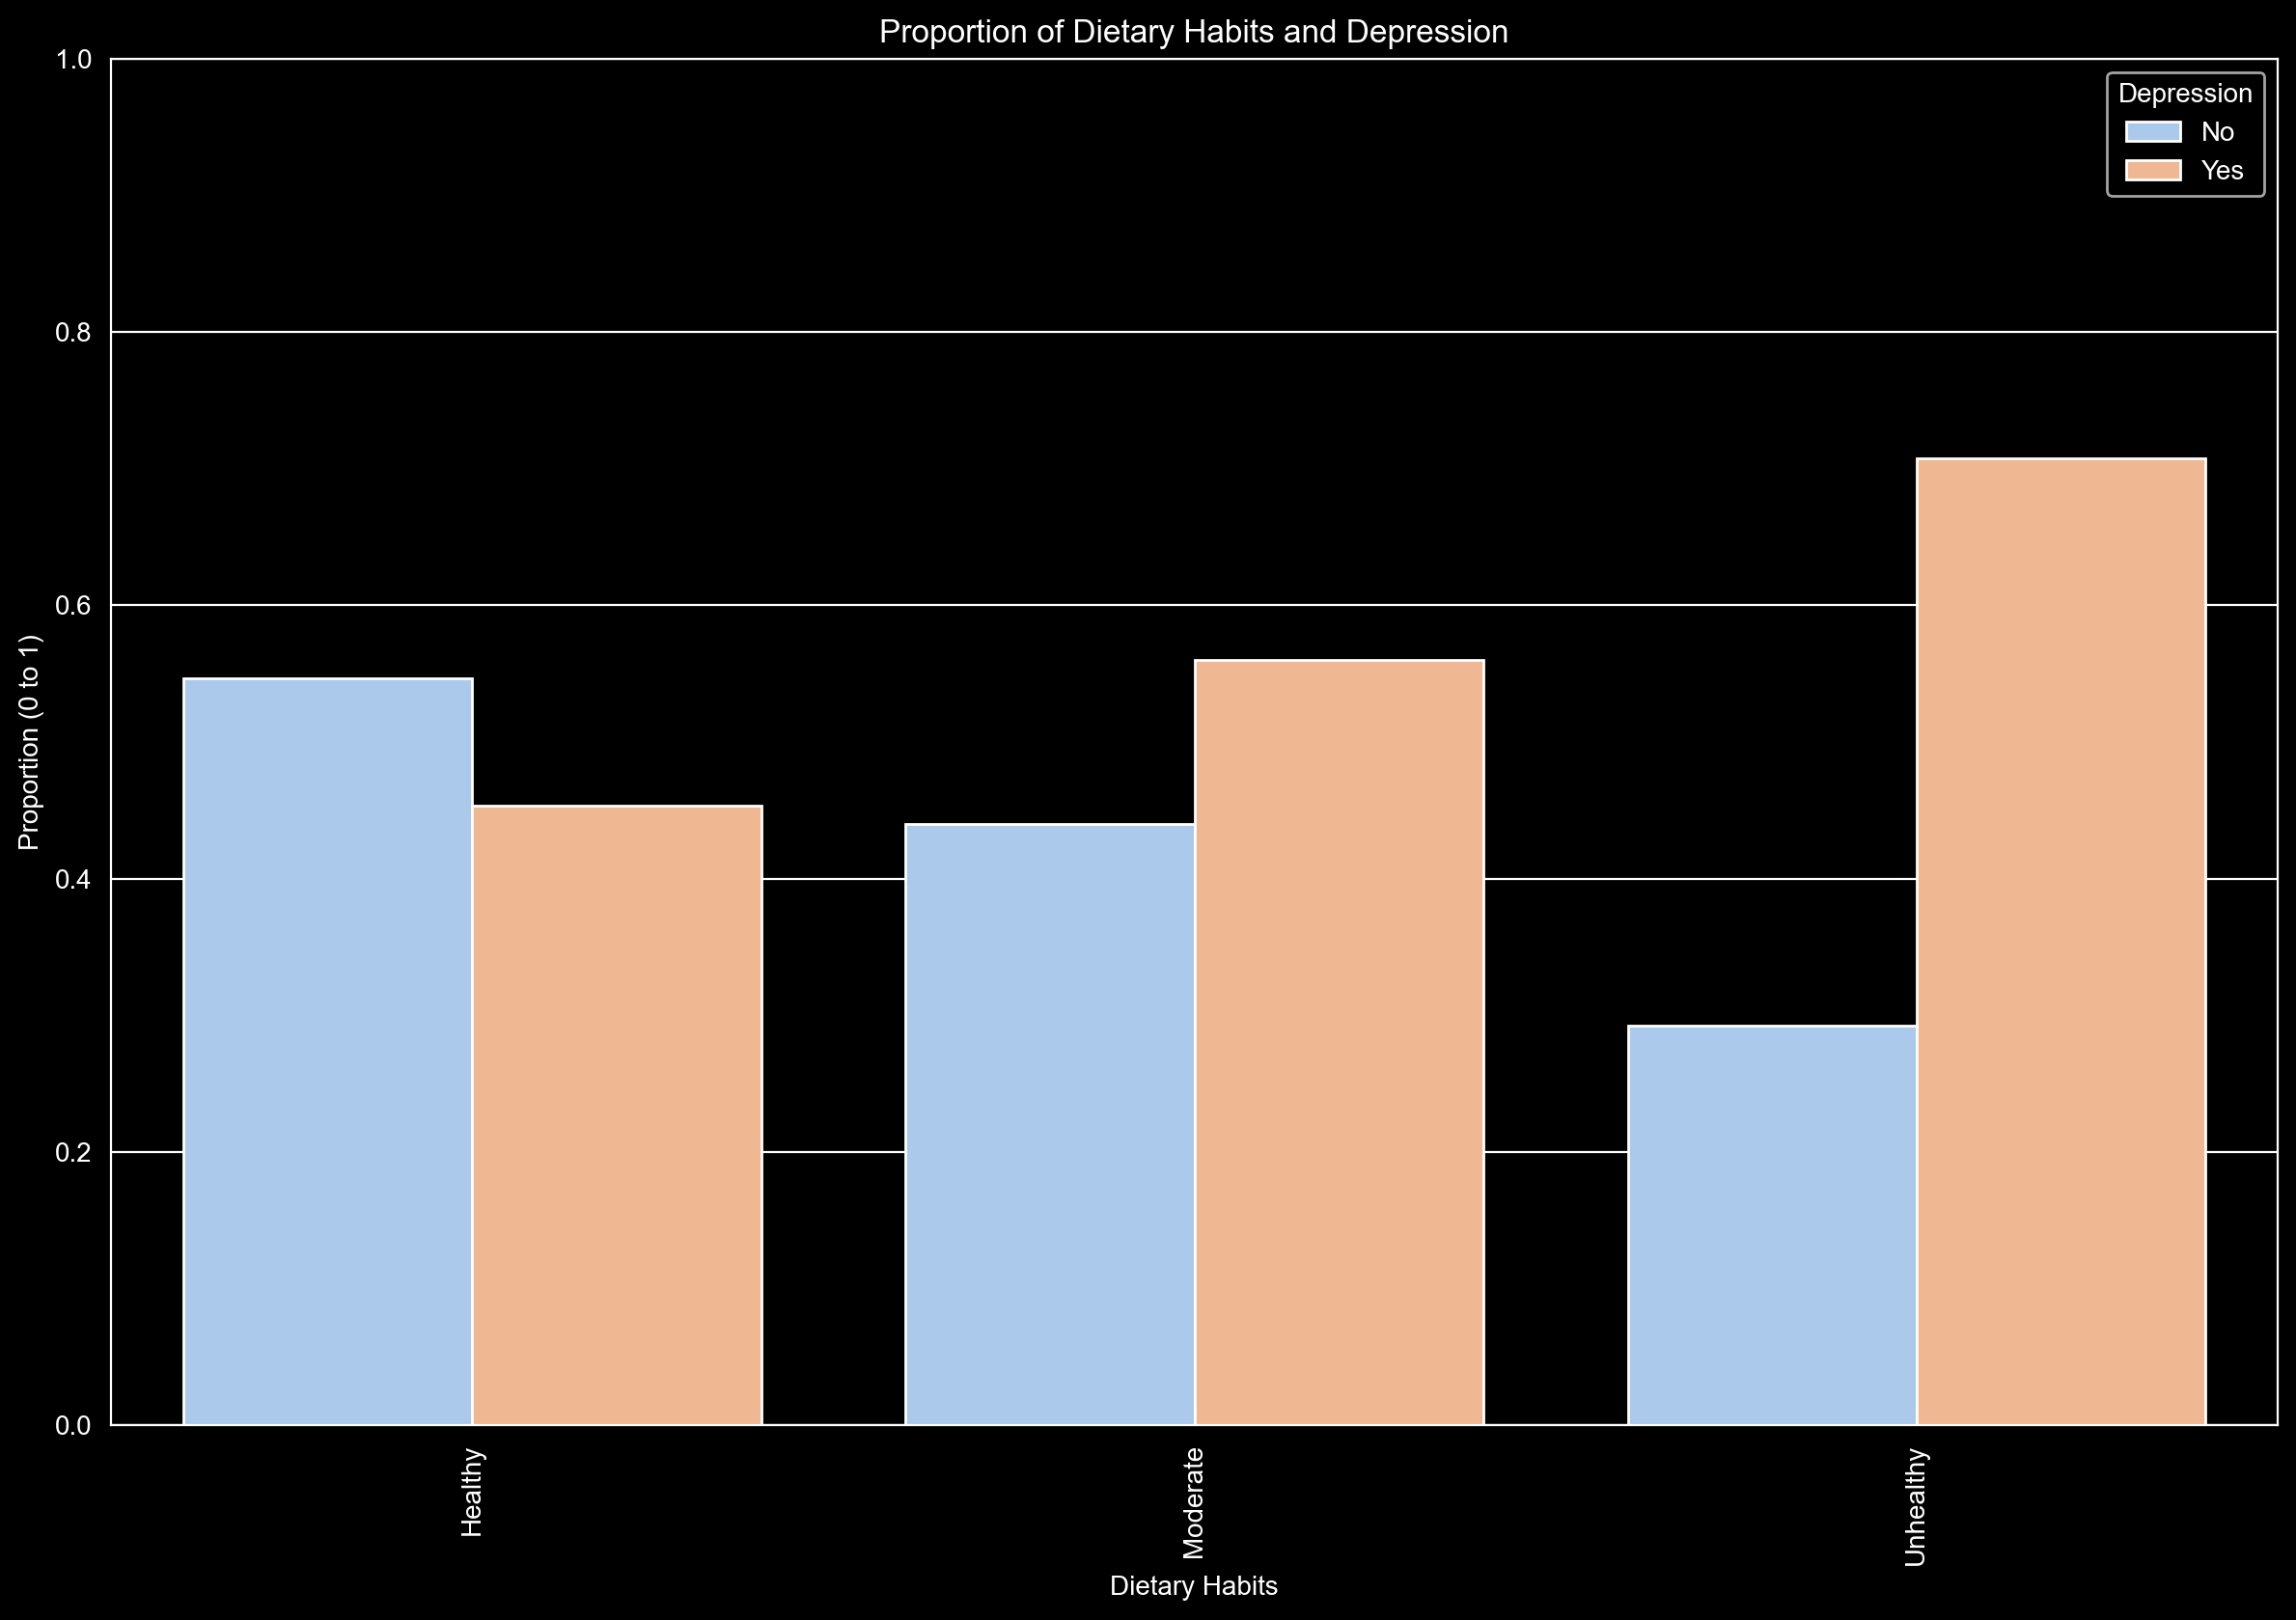

In [47]:
plot_compare_graph(data=df.drop(df[df['Dietary Habits']=='Others'].index,axis=0),x='Dietary Habits',hue=['Depression'])

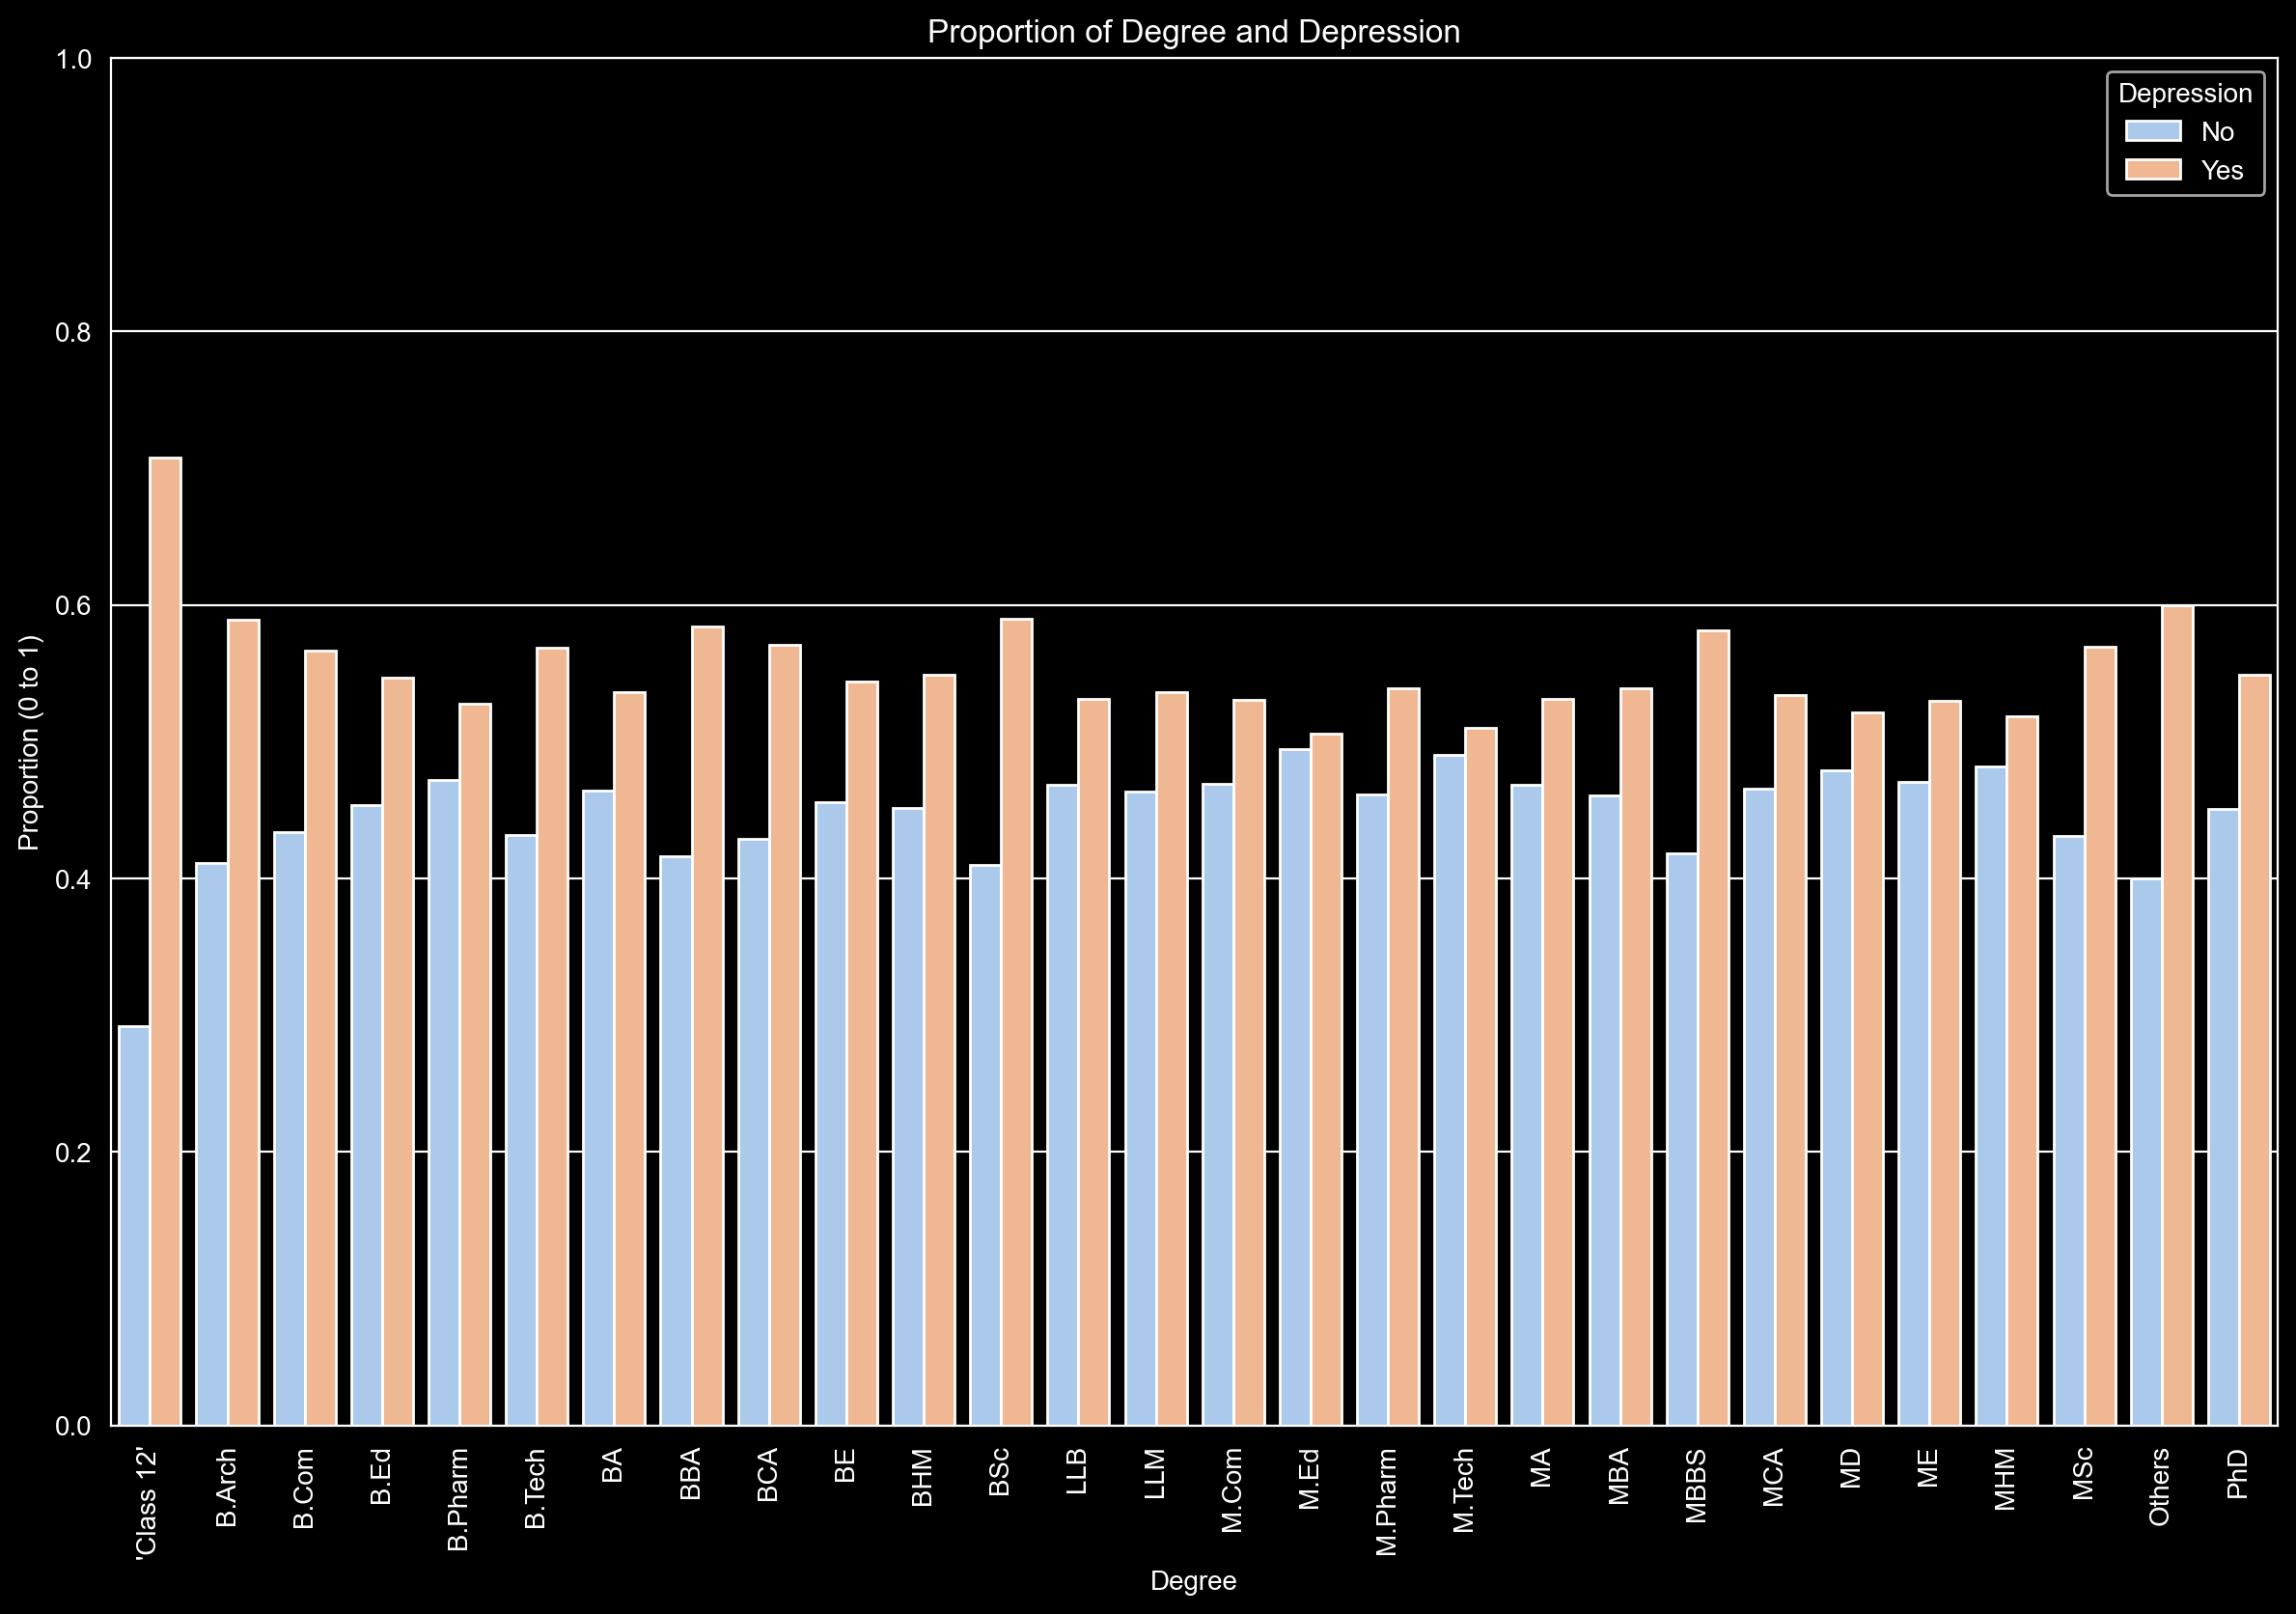

In [48]:
plot_compare_graph(data=df,x='Degree',hue=['Depression'])

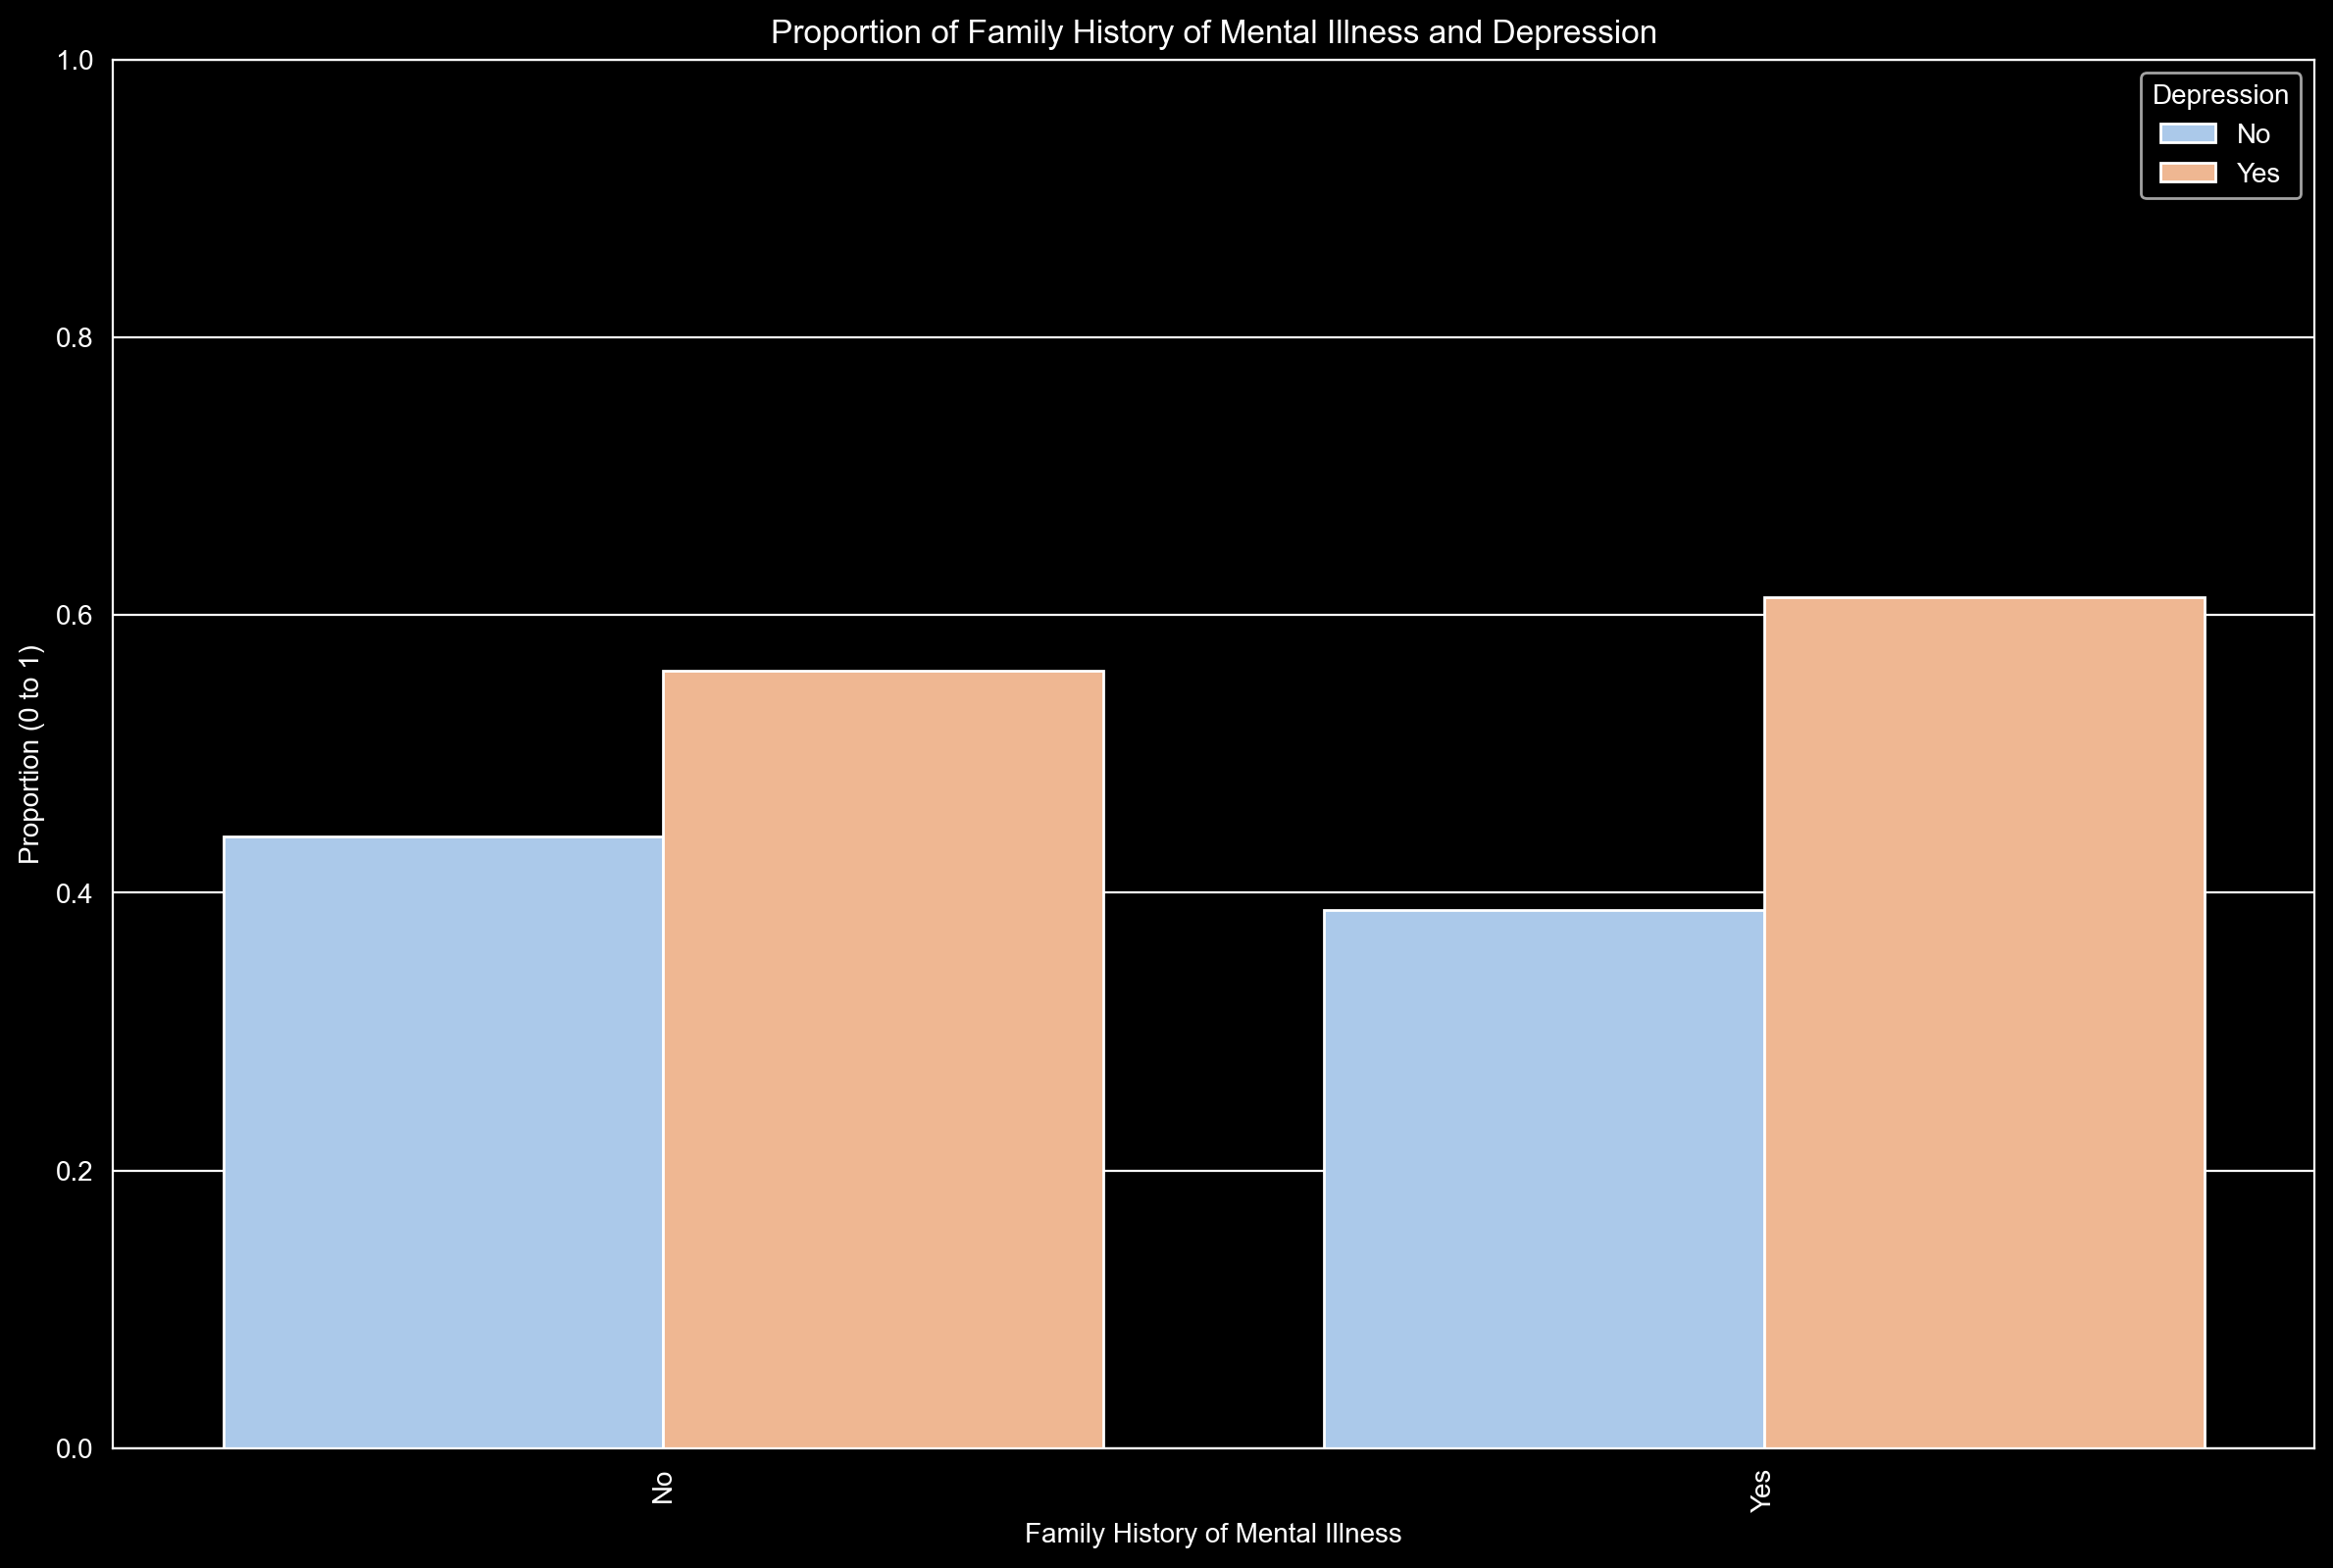

In [49]:
plot_compare_graph(data=df,x='Family History of Mental Illness',hue=['Depression'])

<Axes: >

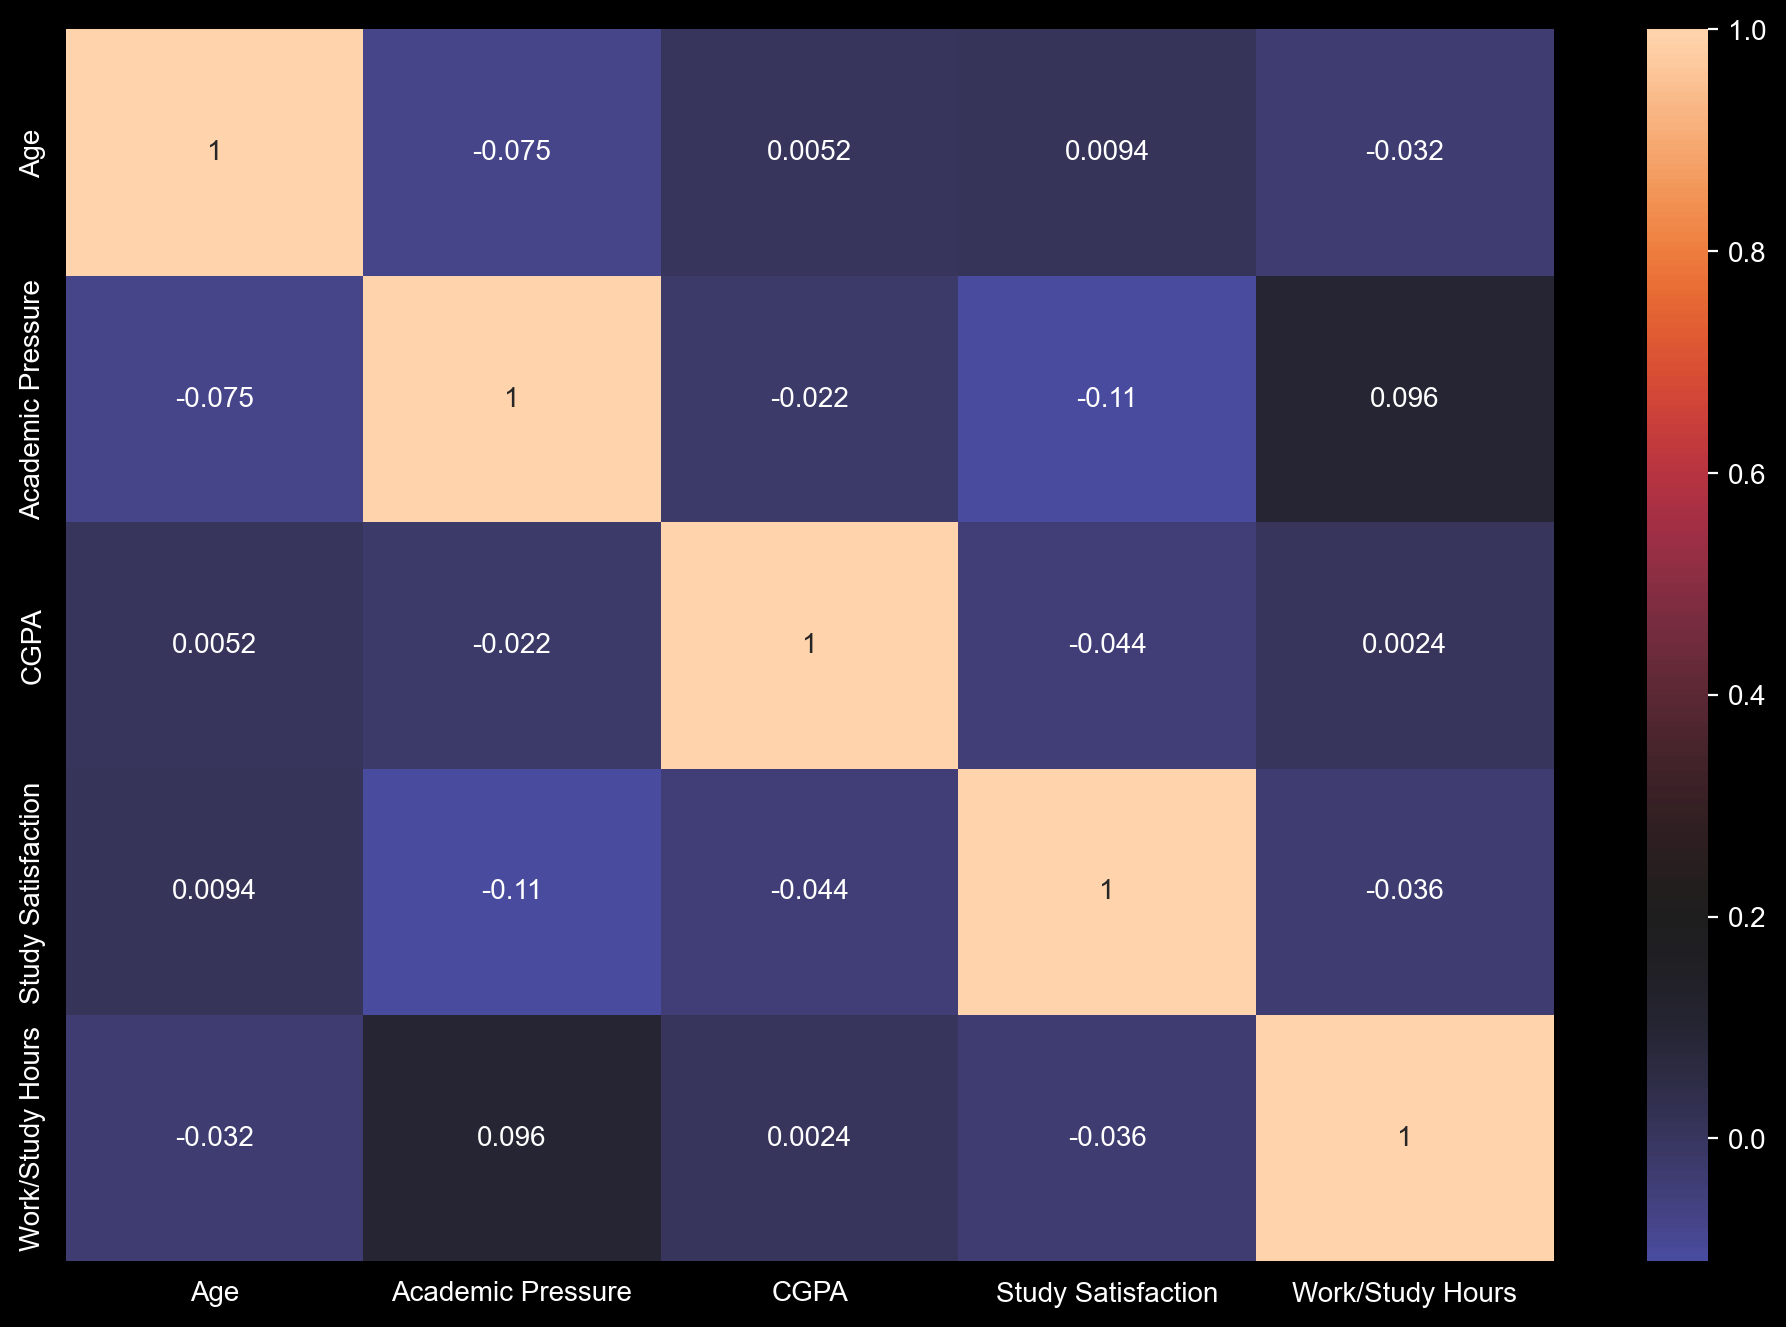

In [50]:
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(df.select_dtypes(exclude=object).corr(),annot=True,center=0.2)

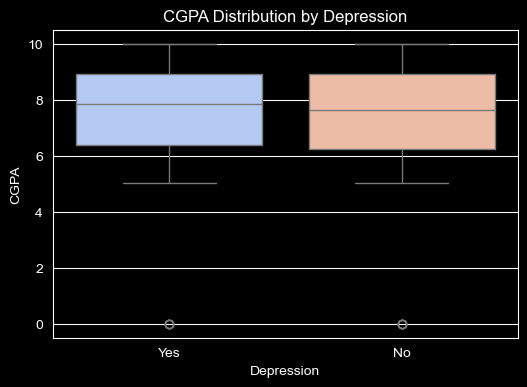

In [51]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Depression', y='CGPA', palette='coolwarm')
plt.title("CGPA Distribution by Depression")
plt.xlabel("Depression")
plt.ylabel("CGPA")
plt.show()


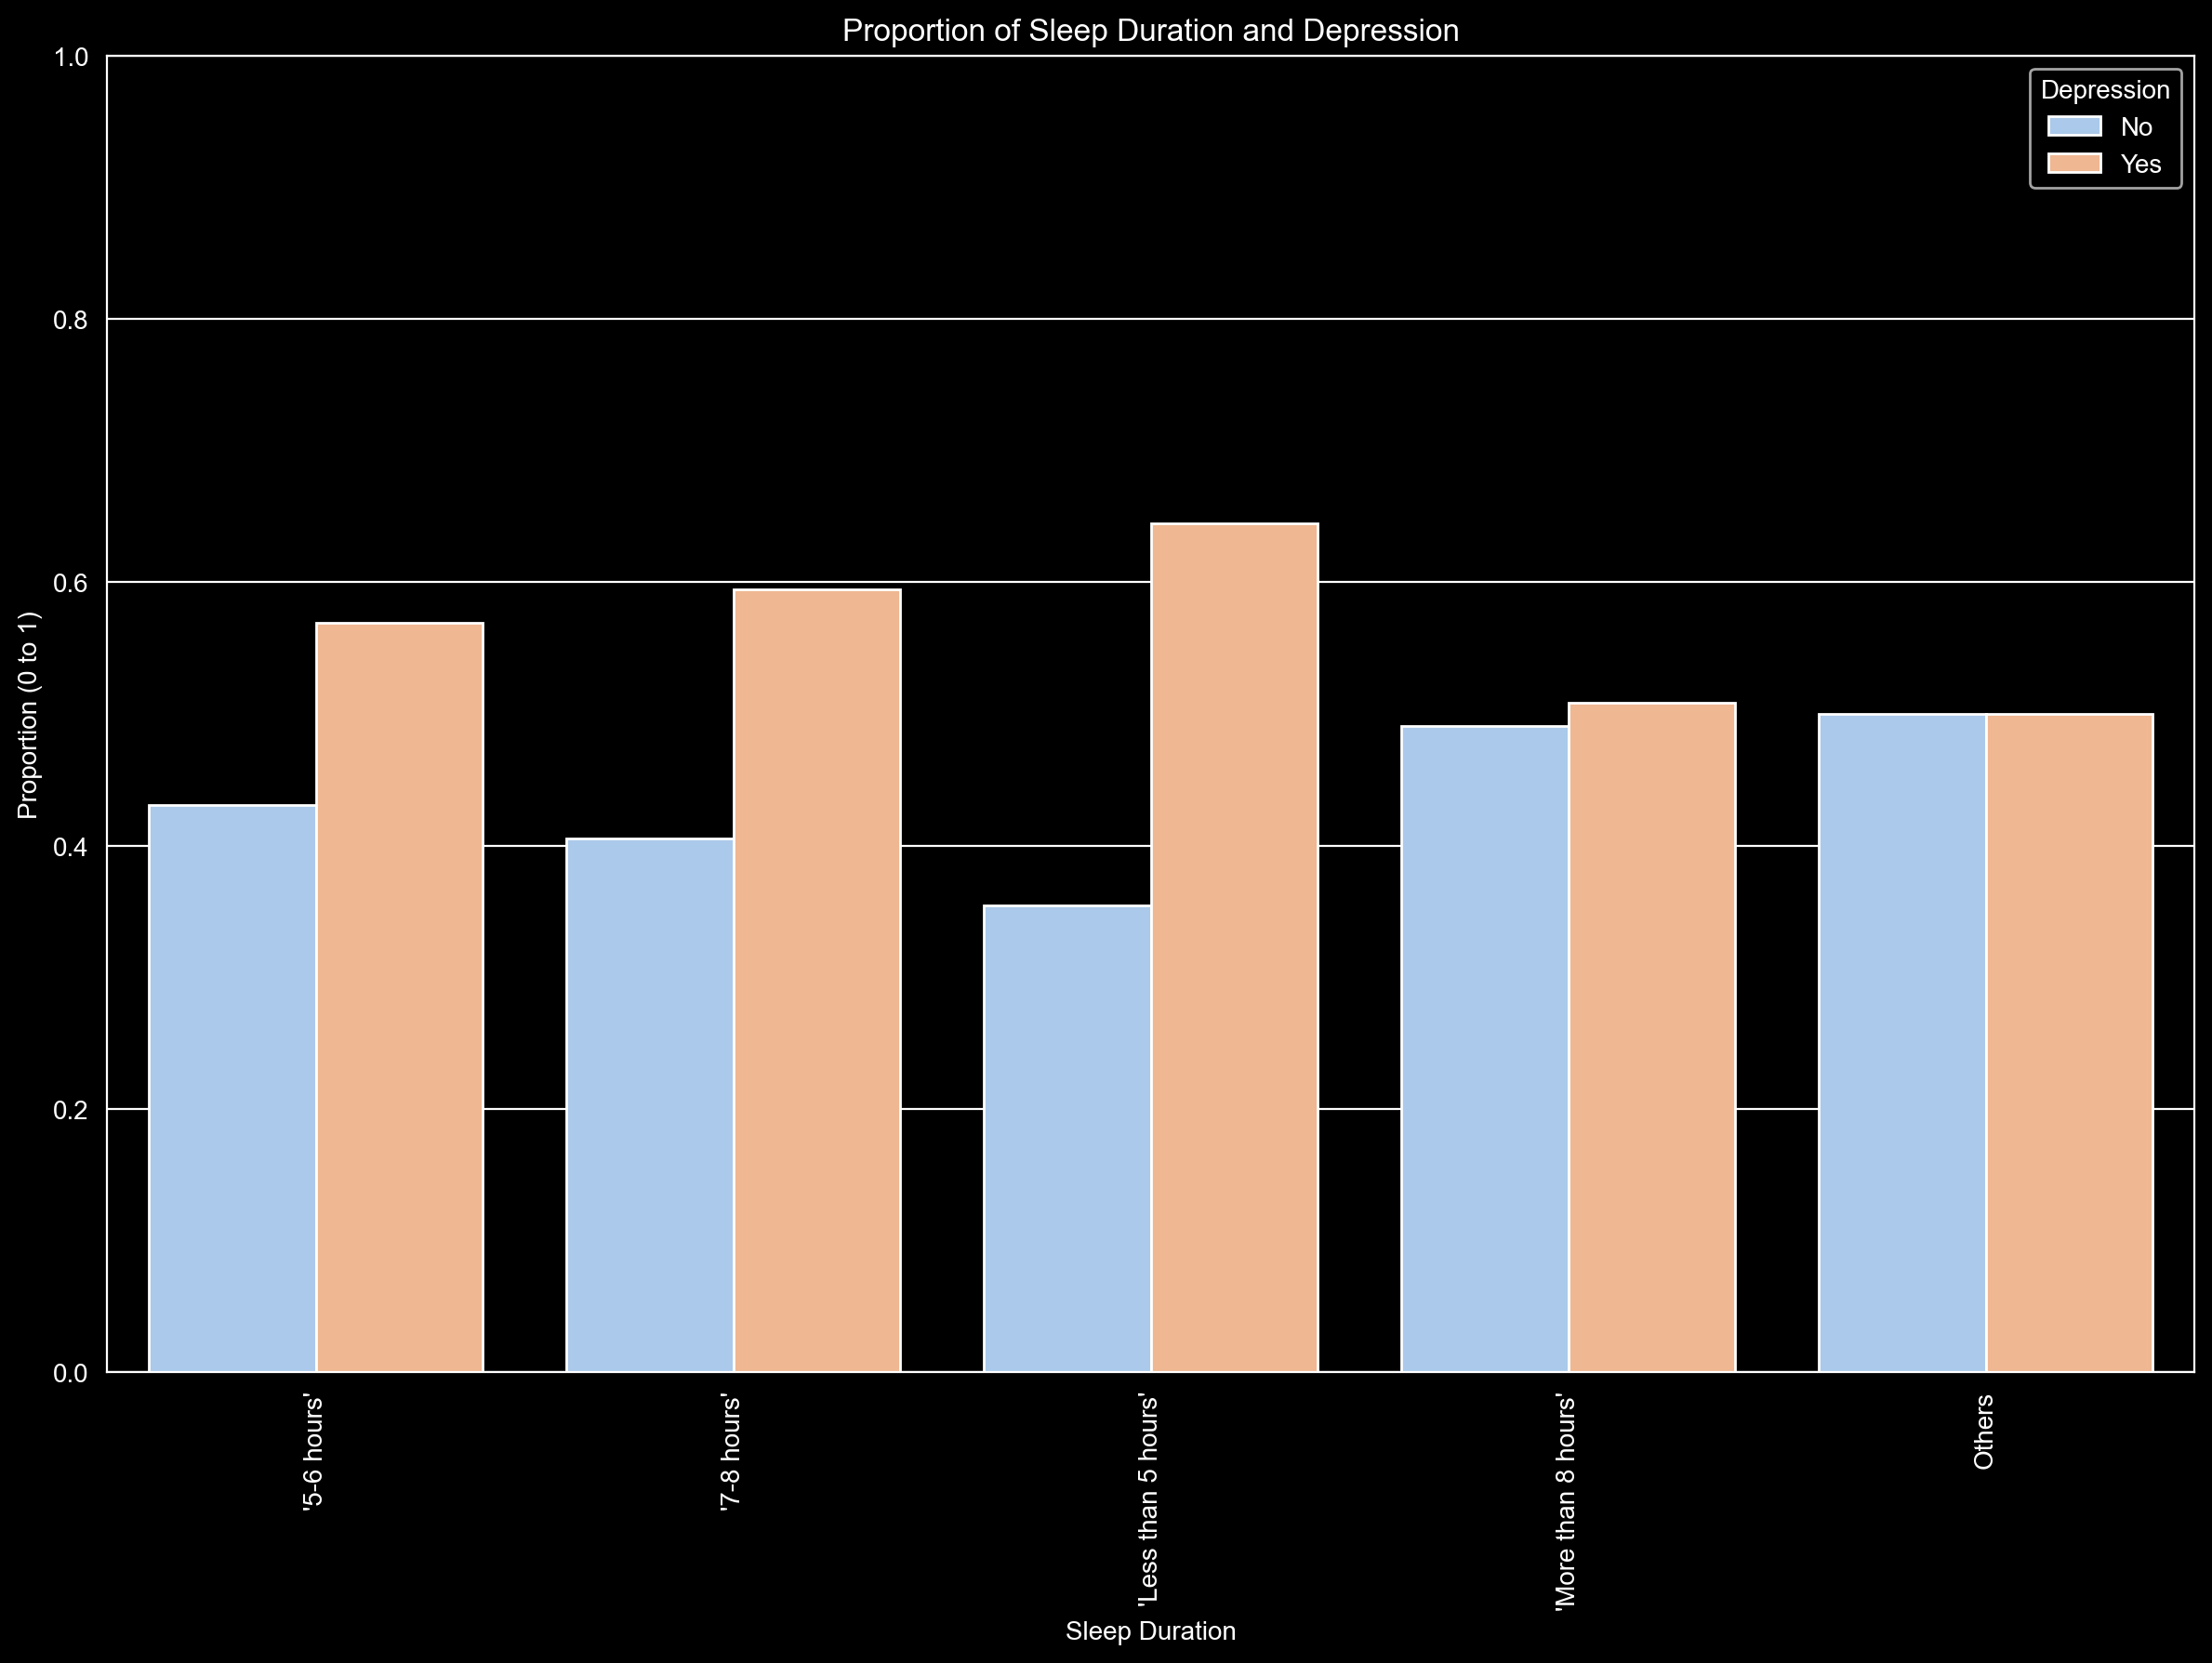

In [52]:
plot_compare_graph(data=df,x='Sleep Duration',hue=['Depression'])


In [53]:
valid_city=['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur','Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara','Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow','Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra','Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna','Faridabad', 'Delhi']
df=df[df['City'].isin(valid_city)]

In [54]:
grp1=df.groupby('City')['Depression'].count()

In [55]:
grp1

City
Agra             1091
Ahmedabad         949
Bangalore         766
Bhopal            932
Chennai           883
Delhi             767
Faridabad         461
Ghaziabad         743
Hyderabad        1338
Indore            643
Jaipur           1034
Kalyan           1564
Kanpur            607
Kolkata          1065
Lucknow          1154
Ludhiana         1108
Meerut            822
Mumbai            698
Nagpur            650
Nashik            545
Patna            1006
Pune              968
Rajkot            814
Srinagar         1371
Surat            1077
Thane            1139
Vadodara          693
Varanasi          684
Vasai-Virar      1289
Visakhapatnam     968
Name: Depression, dtype: int64

In [56]:
city=list(grp1.index)

In [57]:
countcity=list(grp1.values)

In [79]:
geolocator = Nominatim(user_agent="city_locator")
d1=[]
d2=[]
for i in valid_city:
    location = geolocator.geocode(i)
    d1.append(location.latitude)
    d2.append(location.longitude)
    

In [81]:
df2 = pd.DataFrame({
    'City': city ,
    'Depression_Count': countcity,
    'Latitude': d1,
    'Longitude': d2
})


In [83]:
base_map=fol.Map(loctaion=[17.6935526, 83.2921297], zoom_start=5)

In [85]:
for i, j in df2.iterrows():
    fol.Marker(location=[j['Latitude'], j['Longitude']]).add_to(base_map)

In [87]:
base_map

# Encoding

In [90]:
df

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,Yes
1,Female,24.0,Bangalore,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,No
2,Male,31.0,Srinagar,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,No
3,Female,28.0,Varanasi,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,Yes
4,Female,25.0,Jaipur,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27850,Female,27.0,Surat,5.0,5.75,5.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,No
27851,Male,27.0,Ludhiana,2.0,9.40,3.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,No
27852,Male,31.0,Faridabad,3.0,6.61,4.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,No
27853,Female,18.0,Ludhiana,5.0,6.88,2.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,Yes


In [92]:
map0={"'5-6 hours'":5.5, "'Less than 5 hours'":4, "'7-8 hours'":7.5,"'More than 8 hours'":9, "Others":np.nan}
df['Sleep Duration']=df['Sleep Duration'].map(map0)

In [94]:
d=df[df['Sleep Duration'].isnull()].index

In [96]:
d

Index([ 1960,  3797,  3973,  4522,  5512,  5771,  6725,  7681,  7860, 12913,
       14358, 14963, 15078, 15932, 18194, 20283, 22867, 25165],
      dtype='int64')

In [98]:
df.isnull().sum()

Gender                                    0
Age                                       0
City                                      0
Academic Pressure                         0
CGPA                                      0
Study Satisfaction                        0
Sleep Duration                           18
Dietary Habits                            0
Degree                                    0
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          0
Family History of Mental Illness          0
Depression                                0
dtype: int64

In [100]:
df.drop(d, inplace=True)

In [102]:
d=df[df['Degree'] == "'Class 12'"].index

In [104]:
df['Degree'].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', "'Class 12'",
       'B.Ed', 'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA',
       'B.Com', 'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech',
       'BBA', 'ME', 'MHM', 'Others'], dtype=object)

In [106]:
df['Degree']=df['Degree'].replace("'Class 12'", "Senior Year")

In [107]:
def Degrees(degree):
    if degree.startswith('B'):
        return 'Bachelors'
    elif degree.startswith('M'):
        return 'Masters'
    elif degree.endswith('B'):
        return 'Bachelors'
    elif degree.endswith('M'):
        return 'Masters'
    elif degree.startswith('S'):
        return 'Senior Year'
    else:
        return 'Others'

In [108]:
df['Degree']=df['Degree'].apply(Degrees)

In [109]:
df['Degree'].unique()

array(['Bachelors', 'Masters', 'Others', 'Senior Year'], dtype=object)

In [110]:
vaild_city=['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur','Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara','Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow','Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra','Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna','Faridabad', 'Delhi']

In [111]:
df=df[df['City'].isin(vaild_city)]

In [112]:
df['City'].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi'], dtype=object)

In [113]:
north=['Delhi','Ghaziabad','Meerut','Agra', 'Lucknow', 'Kanpur', 'Faridabad', 'Ludhiana', 'Srinagar', 'Jaipur']
south=['Chennai','Bangalore', 'Hyderabad', 'Visakhapatnam']
west=['Mumbai','Thane', 'Vasai-Virar', 'Nashik', 'Pune', 'Ahmedabad', 'Nagpur','Rajkot', 'Surat', 'Vadodara', 'Kalyan', 'Indore', 'Bhopal']
east=['Patna', 'Kolkata', 'Varanasi']

In [114]:
d1=df[df['City'].isin(north)]
d2=df[df['City'].isin(south)]
d3=df[df['City'].isin(west)]
d4=df[df['City'].isin(east)]

In [115]:
def Region(city):
    if city in north:
        return 'North'
    elif city in south:
        return 'South'
    elif city in west:
        return 'West'
    elif city in east:
        return 'East'
    else:
        return 'Others'

In [116]:
df['City']=df['City'].apply(Region)

In [117]:
df['City'].unique()

array(['South', 'North', 'East', 'West'], dtype=object)

In [118]:
df['Dietary Habits'].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

In [119]:
df['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    10281
Moderate      9894
Healthy       7624
Others          12
Name: count, dtype: int64

In [120]:
s=df[df['Dietary Habits'] == "Others"].index

In [121]:
df.drop(s, inplace=True)

### Train test split 

In [123]:
x=df.drop('Depression', axis=1)
y=df['Depression']

In [124]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y, test_size=0.2, random_state=42)

### Gender

In [144]:
map1={'Male':0, 'Female':1}
xtrain['Gender']=xtrain['Gender'].map(map1)
xtest['Gender']=xtest['Gender'].map(map1)

In [146]:
xtrain

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
12416,0,20.0,West,2.0,5.27,3.0,7.5,Healthy,Senior Year,No,10.0,1.0,Yes
24648,1,22.0,South,5.0,5.09,1.0,9.0,Moderate,Bachelors,Yes,10.0,4.0,No
15831,1,31.0,West,5.0,8.08,3.0,7.5,Unhealthy,Masters,Yes,3.0,1.0,Yes
25953,0,20.0,North,1.0,8.59,3.0,9.0,Moderate,Senior Year,Yes,9.0,5.0,Yes
10312,1,28.0,West,1.0,7.37,2.0,9.0,Moderate,Bachelors,No,0.0,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21618,1,29.0,South,3.0,7.48,2.0,5.5,Healthy,Others,No,12.0,1.0,No
5395,1,31.0,West,2.0,9.87,2.0,5.5,Moderate,Senior Year,No,3.0,5.0,No
860,1,29.0,South,3.0,5.76,4.0,7.5,Healthy,Others,Yes,12.0,4.0,Yes
15832,0,28.0,North,4.0,6.38,3.0,9.0,Unhealthy,Masters,Yes,0.0,2.0,Yes


In [148]:
cityconcat=pd.get_dummies(xtrain['City'],drop_first=True).astype(int)

In [150]:
cityconcat

,North,South,West
12416,0,0,1
24648,0,1,0
15831,0,0,1
25953,1,0,0
10312,0,0,1
...,...,...,...
21618,0,1,0
5395,0,0,1
860,0,1,0
15832,1,0,0


In [152]:
xtrain=pd.concat([xtrain, cityconcat], axis=1)

In [154]:
xtrain.drop('City', axis=1, inplace=True)

In [155]:
xtrain

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,North,South,West
12416,0,20.0,2.0,5.27,3.0,7.5,Healthy,Senior Year,No,10.0,1.0,Yes,0,0,1
24648,1,22.0,5.0,5.09,1.0,9.0,Moderate,Bachelors,Yes,10.0,4.0,No,0,1,0
15831,1,31.0,5.0,8.08,3.0,7.5,Unhealthy,Masters,Yes,3.0,1.0,Yes,0,0,1
25953,0,20.0,1.0,8.59,3.0,9.0,Moderate,Senior Year,Yes,9.0,5.0,Yes,1,0,0
10312,1,28.0,1.0,7.37,2.0,9.0,Moderate,Bachelors,No,0.0,3.0,No,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21618,1,29.0,3.0,7.48,2.0,5.5,Healthy,Others,No,12.0,1.0,No,0,1,0
5395,1,31.0,2.0,9.87,2.0,5.5,Moderate,Senior Year,No,3.0,5.0,No,0,0,1
860,1,29.0,3.0,5.76,4.0,7.5,Healthy,Others,Yes,12.0,4.0,Yes,0,1,0
15832,0,28.0,4.0,6.38,3.0,9.0,Unhealthy,Masters,Yes,0.0,2.0,Yes,1,0,0


In [156]:
xtestcity=pd.get_dummies(xtest['City'], drop_first=True).astype(int)

In [157]:
xtestcity

,North,South,West
18208,0,0,0
19844,1,0,0
14977,1,0,0
17504,1,0,0
22439,0,0,1
...,...,...,...
23808,0,0,1
11215,0,0,1
17000,0,0,1
3388,0,0,1


In [158]:
xtest=pd.concat([xtest, xtestcity], axis=1)

In [159]:
xtest

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,North,South,West
18208,0,20.0,East,3.0,5.99,3.0,7.5,Unhealthy,Senior Year,Yes,10.0,4.0,Yes,0,0,0
19844,0,24.0,North,4.0,6.21,5.0,9.0,Unhealthy,Senior Year,Yes,6.0,3.0,No,1,0,0
14977,0,33.0,North,3.0,6.99,4.0,5.5,Unhealthy,Masters,Yes,11.0,4.0,Yes,1,0,0
17504,1,24.0,North,3.0,8.96,3.0,7.5,Moderate,Bachelors,Yes,5.0,3.0,No,1,0,0
22439,0,29.0,West,3.0,6.83,2.0,4.0,Moderate,Bachelors,Yes,11.0,3.0,No,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23808,1,32.0,West,2.0,5.79,1.0,4.0,Moderate,Bachelors,Yes,0.0,4.0,Yes,0,0,1
11215,1,18.0,West,4.0,5.89,2.0,4.0,Moderate,Senior Year,Yes,6.0,4.0,Yes,0,0,1
17000,0,20.0,West,3.0,6.76,3.0,7.5,Unhealthy,Senior Year,No,3.0,5.0,No,0,0,1
3388,0,22.0,West,2.0,5.16,1.0,7.5,Unhealthy,Masters,Yes,7.0,4.0,No,0,0,1


In [160]:
xtrain['Dietary Habits'].unique()

array(['Healthy', 'Moderate', 'Unhealthy'], dtype=object)

In [161]:
xtrain['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    8267
Moderate     7964
Healthy      6008
Name: count, dtype: int64

In [162]:
xtrain['Dietary Habits'].unique()

array(['Healthy', 'Moderate', 'Unhealthy'], dtype=object)

In [163]:
map3={'Unhealthy':0, 'Moderate':1, 'Healthy':2}
xtrain['Dietary Habits']=xtrain['Dietary Habits'].map(map3)
xtest['Dietary Habits']=xtest['Dietary Habits'].map(map3)

In [164]:
xtrain

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,North,South,West
12416,0,20.0,2.0,5.27,3.0,7.5,2,Senior Year,No,10.0,1.0,Yes,0,0,1
24648,1,22.0,5.0,5.09,1.0,9.0,1,Bachelors,Yes,10.0,4.0,No,0,1,0
15831,1,31.0,5.0,8.08,3.0,7.5,0,Masters,Yes,3.0,1.0,Yes,0,0,1
25953,0,20.0,1.0,8.59,3.0,9.0,1,Senior Year,Yes,9.0,5.0,Yes,1,0,0
10312,1,28.0,1.0,7.37,2.0,9.0,1,Bachelors,No,0.0,3.0,No,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21618,1,29.0,3.0,7.48,2.0,5.5,2,Others,No,12.0,1.0,No,0,1,0
5395,1,31.0,2.0,9.87,2.0,5.5,1,Senior Year,No,3.0,5.0,No,0,0,1
860,1,29.0,3.0,5.76,4.0,7.5,2,Others,Yes,12.0,4.0,Yes,0,1,0
15832,0,28.0,4.0,6.38,3.0,9.0,0,Masters,Yes,0.0,2.0,Yes,1,0,0


In [165]:
xtest

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,North,South,West
18208,0,20.0,East,3.0,5.99,3.0,7.5,0,Senior Year,Yes,10.0,4.0,Yes,0,0,0
19844,0,24.0,North,4.0,6.21,5.0,9.0,0,Senior Year,Yes,6.0,3.0,No,1,0,0
14977,0,33.0,North,3.0,6.99,4.0,5.5,0,Masters,Yes,11.0,4.0,Yes,1,0,0
17504,1,24.0,North,3.0,8.96,3.0,7.5,1,Bachelors,Yes,5.0,3.0,No,1,0,0
22439,0,29.0,West,3.0,6.83,2.0,4.0,1,Bachelors,Yes,11.0,3.0,No,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23808,1,32.0,West,2.0,5.79,1.0,4.0,1,Bachelors,Yes,0.0,4.0,Yes,0,0,1
11215,1,18.0,West,4.0,5.89,2.0,4.0,1,Senior Year,Yes,6.0,4.0,Yes,0,0,1
17000,0,20.0,West,3.0,6.76,3.0,7.5,0,Senior Year,No,3.0,5.0,No,0,0,1
3388,0,22.0,West,2.0,5.16,1.0,7.5,0,Masters,Yes,7.0,4.0,No,0,0,1


In [176]:
map4={'Yes':1, 'No':0}
xtrain['Have you ever had suicidal thoughts ?']=xtrain['Have you ever had suicidal thoughts ?'].map(map4)
xtest['Have you ever had suicidal thoughts ?']=xtest['Have you ever had suicidal thoughts ?'].map(map4)
xtrain['Family History of Mental Illness']=xtrain['Family History of Mental Illness'].map(map4)
xtest['Family History of Mental Illness']=xtest['Family History of Mental Illness'].map(map4)

In [180]:
deg=pd.get_dummies(xtrain['Degree'], drop_first=True).astype(int)

In [182]:
deg

,Masters,Others,Senior Year
12416,0,0,1
24648,0,0,0
15831,1,0,0
25953,0,0,1
10312,0,0,0
...,...,...,...
21618,0,1,0
5395,0,0,1
860,0,1,0
15832,1,0,0


In [183]:
xtrain=pd.concat([xtrain, deg], axis=1)

In [184]:
xtestdeg=pd.get_dummies(xtest['Degree'], drop_first=True).astype(int)

In [185]:
xtest=pd.concat([xtest, xtestdeg], axis=1)

In [186]:
xtrain

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,North,South,West,Masters,Others,Senior Year
12416,0,20.0,2.0,5.27,3.0,7.5,2,Senior Year,0,10.0,1.0,1,0,0,1,0,0,1
24648,1,22.0,5.0,5.09,1.0,9.0,1,Bachelors,1,10.0,4.0,0,0,1,0,0,0,0
15831,1,31.0,5.0,8.08,3.0,7.5,0,Masters,1,3.0,1.0,1,0,0,1,1,0,0
25953,0,20.0,1.0,8.59,3.0,9.0,1,Senior Year,1,9.0,5.0,1,1,0,0,0,0,1
10312,1,28.0,1.0,7.37,2.0,9.0,1,Bachelors,0,0.0,3.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21618,1,29.0,3.0,7.48,2.0,5.5,2,Others,0,12.0,1.0,0,0,1,0,0,1,0
5395,1,31.0,2.0,9.87,2.0,5.5,1,Senior Year,0,3.0,5.0,0,0,0,1,0,0,1
860,1,29.0,3.0,5.76,4.0,7.5,2,Others,1,12.0,4.0,1,0,1,0,0,1,0
15832,0,28.0,4.0,6.38,3.0,9.0,0,Masters,1,0.0,2.0,1,1,0,0,1,0,0


In [187]:
xtrain.drop('Degree', axis=1, inplace=True)

In [188]:
xtest.drop('Degree', axis=1, inplace=True)

In [189]:
xtrain

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,North,South,West,Masters,Others,Senior Year
12416,0,20.0,2.0,5.27,3.0,7.5,2,0,10.0,1.0,1,0,0,1,0,0,1
24648,1,22.0,5.0,5.09,1.0,9.0,1,1,10.0,4.0,0,0,1,0,0,0,0
15831,1,31.0,5.0,8.08,3.0,7.5,0,1,3.0,1.0,1,0,0,1,1,0,0
25953,0,20.0,1.0,8.59,3.0,9.0,1,1,9.0,5.0,1,1,0,0,0,0,1
10312,1,28.0,1.0,7.37,2.0,9.0,1,0,0.0,3.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21618,1,29.0,3.0,7.48,2.0,5.5,2,0,12.0,1.0,0,0,1,0,0,1,0
5395,1,31.0,2.0,9.87,2.0,5.5,1,0,3.0,5.0,0,0,0,1,0,0,1
860,1,29.0,3.0,5.76,4.0,7.5,2,1,12.0,4.0,1,0,1,0,0,1,0
15832,0,28.0,4.0,6.38,3.0,9.0,0,1,0.0,2.0,1,1,0,0,1,0,0


In [190]:
xtest

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,North,South,West,Masters,Others,Senior Year
18208,0,20.0,East,3.0,5.99,3.0,7.5,0,1,10.0,4.0,1,0,0,0,0,0,1
19844,0,24.0,North,4.0,6.21,5.0,9.0,0,1,6.0,3.0,0,1,0,0,0,0,1
14977,0,33.0,North,3.0,6.99,4.0,5.5,0,1,11.0,4.0,1,1,0,0,1,0,0
17504,1,24.0,North,3.0,8.96,3.0,7.5,1,1,5.0,3.0,0,1,0,0,0,0,0
22439,0,29.0,West,3.0,6.83,2.0,4.0,1,1,11.0,3.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23808,1,32.0,West,2.0,5.79,1.0,4.0,1,1,0.0,4.0,1,0,0,1,0,0,0
11215,1,18.0,West,4.0,5.89,2.0,4.0,1,1,6.0,4.0,1,0,0,1,0,0,1
17000,0,20.0,West,3.0,6.76,3.0,7.5,0,0,3.0,5.0,0,0,0,1,0,0,1
3388,0,22.0,West,2.0,5.16,1.0,7.5,0,1,7.0,4.0,0,0,0,1,1,0,0


In [191]:
xtest.drop('City', axis=1, inplace=True)

# SVC

In [203]:
svc=SVC(class_weight='balanced')

In [205]:
s=StandardScaler()

In [207]:
xtrain_scaled=s.fit_transform(xtrain)
xtest_scaled=s.transform(xtest)

In [209]:
svc.fit(xtrain_scaled, ytrain)

SVC(class_weight='balanced')

In [210]:
cross_svc= cross_val_score(svc, xtrain_scaled, ytrain, cv=5)

In [212]:
cross_svc

array([0.83408273, 0.84330036, 0.84419964, 0.83678058, 0.84326512])

In [215]:
xpred_svc=svc.predict(xtrain_scaled)

In [216]:
ypred_svc=svc.predict(xtest_scaled)

## Overfitting check

### Training check

In [ ]:
print(classification_report(ytrain, xpred_rfc))

### Testing check 

In [ ]:
print(classification_report(ytest, ypred_svc))

In [ ]:
cm1= confusion_matrix(ytrain, xpred_svc)
sns.heatmap(cm1, annot=True)
plt.title("Confusion Matrix for TRAINING")

In [ ]:
cm2= confusion_matrix(ytest, ypred_svc)
sns.heatmap(cm2, annot=True)
plt.title("Confusion matrix for TESTING")

# RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier(random_state=42, class_weight='balanced')


In [ ]:
param_grid1 = {
    'n_estimators': [100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}



In [ ]:
grid_1=GridSearchCV(RFC, param_grid=param_grid1, n_jobs=-1, cv=5)

In [ ]:
grid_1.fit(xtrain_scaled, ytrain)

In [ ]:
best_p=grid_1.best_estimator_

In [ ]:
xpred_rfc=best_p.predict(xtrain_scaled)

In [ ]:
ypred_rfc=best_p.predict(xtest_scaled)

## Overfitting Check

### Training Check

In [ ]:
print(classification_report(ytrain, xpred_svc))

In [ ]:
print(classification_report(ytest, ypred_rfc))

In [ ]:
cm3= confusion_matrix(ytrain, xpred_rfc)
sns.heatmap(cm3, annot=True)
plt.title("Confusion matrix for TRAINING")

In [ ]:
cm4= confusion_matrix(ytest, ypred_rfc)
sns.heatmap(cm4, annot=True)
plt.title("Confusion matrix for TESTING")

# Logistic Regression

In [ ]:
lr=LogisticRegression(random_state=42, class_weight='balanced')

In [ ]:
lr.fit(xtrain_scaled, ytrain)

In [ ]:
xpred_lr=lr.predict(xtrain_scaled)
ypred_lr=lr.predict(xtest_scaled)

In [ ]:
boosting_model= AdaBoostClassifier(lr, n_estimators=50, random_state=42)

In [ ]:
boosting_model.fit(xtrain_scaled, ytrain)

In [ ]:
lr_ada_ypred=boosting_model.predict(xtest_scaled)

In [ ]:
print(classification_report(ytest, lr_ada_ypred))

## Overfitting Check

### Training check

In [ ]:
print(classification_report(ytrain, xpred_lr))

### Testing Check

In [ ]:
print(classification_report(ytest, ypred_lr))

# Decision Tree 

In [ ]:
tree=DecisionTreeClassifier(max_depth=20,random_state=42)
tree.fit(xtrain_scaled, ytrain)

In [ ]:
ypred_tree=tree.predict(xtest_scaled)

In [ ]:
print(classification_report(ytest, ypred_tree))

In [ ]:
param_grid3= {
    'criterion': ['gini'],  
    'splitter': ['best'],   
    'max_depth': [None, 5, 10], 
    'min_samples_split': [2, 5], 
    'min_samples_leaf': [1, 2],   
    'max_features': [None, 'sqrt'],  
    'ccp_alpha': [0.0, 0.01],  
}

In [ ]:
grid_3=GridSearchCV(tree, param_grid= param_grid3, cv=5)

In [ ]:
grid_3.fit(xtrain_scaled, ytrain)

In [ ]:
best_para=grid_3.best_estimator_

In [ ]:
best_para

In [ ]:
ypred_tree=best_para.predict(xtest_scaled)

In [ ]:
print(classification_report(ytest, ypred_tree))

In [ ]:
tree_ada=AdaBoostClassifier(best_para, n_estimators=30, random_state=42)

In [ ]:
param_grid4 = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]
}

In [ ]:
grid_4=GridSearchCV(tree_ada, param_grid= param_grid4, cv=5 )

In [ ]:
grid_4.fit(xtrain_scaled, ytrain)

In [ ]:
best_ada_para=grid_4.best_estimator_

In [ ]:
print(best_ada_para)

In [ ]:
best_ada_para.fit(xtrain_scaled, ytrain)

In [ ]:
tree_ada_ypred=best_ada_para.predict(xtest_scaled)

In [ ]:
tree_ada_xpred=best_ada_para.predict(xtrain_scaled)

# Overfitting Check

## Train Data 

In [ ]:
print(classification_report(ytrain, tree_ada_xpred))

## Test Data

In [ ]:
print(classification_report(ytest, tree_ada_ypred))

# KNN

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(xtrain_scaled, ytrain)

In [ ]:
xpred_knn=knn.predict(xtrain_scaled)

In [ ]:
ypred_knn=knn.predict(xtest_scaled)

## Overfitting Test

## Training Check

In [ ]:
print(classification_report(xpred_knn, ytrain))

## Testing Check

In [ ]:
print(classification_report(ypred_knn, ytest))

# XGBoost

In [219]:
import xgboost as xg

In [221]:
xg_model=xg.XGBClassifier()

In [223]:
map1={'No':0, 'Yes':1}
ytrain=ytrain.map(map1)
ytest=ytest.map(map1)

In [225]:
xg_model = xg.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

xg_model.fit(xtrain_scaled, ytrain)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [226]:
xpred_xg=xg_model.predict(xtrain_scaled)

In [227]:
ypred_xg=xg_model.predict(xtest_scaled)

In [228]:
print(classification_report(ytrain, xpred_xg))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      9217
           1       0.92      0.94      0.93     13022

    accuracy                           0.92     22239
   macro avg       0.92      0.92      0.92     22239
weighted avg       0.92      0.92      0.92     22239



In [229]:
print(classification_report(ytest, ypred_xg))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      2309
           1       0.86      0.87      0.86      3251

    accuracy                           0.84      5560
   macro avg       0.83      0.83      0.83      5560
weighted avg       0.84      0.84      0.84      5560



In [230]:
param_grid3 = {
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


In [237]:
grid3=GridSearchCV(xg_model, param_grid=param_grid3, cv=3)

In [239]:
grid3.fit(xtrain_scaled, ytrain)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100], 'subsample': [0.8, 1.0]})

In [240]:
best=grid3.best_estimator_

In [241]:
xpred_xgcv=best.predict(xtrain_scaled)

In [242]:
ypred_xgcv=best.predict(xtest_scaled)

### Training check

In [ ]:
print(classification_report(xpred_xgcv, ytrain))

### Testing Check

In [ ]:
print(classification_report(ypred_xgcv, ytest))

# Best Model

In [ ]:
models = ['SVC', 'Random Forest', 'Logistic Regression', 'Decision Tree', 'KNN', 'XGBoost']
accuracy = [0.84, 0.84, 0.84, 0.84, 0.82, 0.85]
f1_score = [0.84, 0.84, 0.84, 0.84, 0.82, 0.85]
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color='skyblue', label='Accuracy')
plt.plot(models, f1_score, color='red', marker='o', label='F1 Score')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0.8, 0.87)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()